In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plot
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline

In [2]:
# read dataset into the dataframe
df = pd.read_csv("Airbnb_Open_Data.csv" , sep = "," , encoding = 'utf-8')

C:\Users\User\AppData\Local\Temp\ipykernel_11844\1595135665.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Airbnb_Open_Data.csv" , sep = "," , encoding = 'utf-8')


In [3]:
# total 102599 row and 26 columns
df.shape

(102599, 26)

In [4]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
df.tail()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,...,$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN


In [6]:
#show types for all columns
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [7]:
# replace all the columns "space" with "_" to further coding purposes.
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

Based on the observation on the dataset, we can find out the meaning that represent by each columns are as following:

# Column & Description

id                    : Unique ID assigned to each Airbnb listing

name                  : Name of the Airbnb listing

host id               : Unique ID assigned to each Airbnb host

host_identity_verified: Host Identity verification status (either not verified or verified)

host_name             : Name of the Airbnb host

neighbourhood group   : grouping of neighbourhoods within a larger area

neighbourhood         : name of the neighbourhood where the listing is located

lat                   : latitude coordinate of the listing

long                  : longitude coordinate of the lsiting

country               : Country where the listing is located

country_code          : Country code of the country where the listing is located

instant_bookable      : whether the guest can automatically book the listing without host requiring

cancellation_policy   : cancellation policy for the listing

room_type             : type of room available in the listing, eg: private, shared, hotel, apartments.

construction_year     : Year in which the listing was constructed

price                 : price per night for the listing

service_fee           : fee charged by Airbnb for services provided

minimum_nights        : minimum number of nights a guest can book the listing for 

number_of_reviews     : total number of reviews for the listing

last_review           : date of the most recent review for the listing

reviews_per_month     : average number of reviews per month for he listing

review_rate_number    : rate at which the listing is reviewed by guests

calculated_host_listing_count: number of listings for the host

availability_365      : number of days per year the listing is available for booking

house_rules           : any specific rules or regulations for the listing

license               : license required for operating the listing


In [8]:
# see the brief information for tis dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102349 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102193 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

# Data Validation & Feature Selection

"license" columns only having 2 row of data out of 100,000++ data. 
definitely we going to remove it!
( not much info it is going to give us )

In [9]:
# license have all null value except for 2 rows.... definitely we going to remove it!
df.drop("license", axis=1, inplace = True)

as tis dataset is airbnb data in newyork... lets check whether the country have only 1 value? 


In [10]:
# as tis dataset is airbnb data in newyork... lets check whether the country have only 1 value? 
df.country.unique()

array(['United States', nan], dtype=object)

YES! definitely it is, New York is a City in United States. 

Hmmm, so does that mean Country code has only 1 value as well? 

In [11]:
# as we saw country have only1 value, lets check for country code as well just incase
df.country_code.unique()

array(['US', nan], dtype=object)

OFCOURSE IT IS! Sincce both of them are having 1 values only....

there is nothing that we can do analysis on them. 

lets just remove them in the Dataframe.

In [12]:
# since both of them are having only 1 values.. we got to remove them from the dataframe
df.drop("country", axis = 1, inplace = True)
df.drop("country_code", axis = 1, inplace = True)

latitude and longitude is not going to give us any information since the location is mentioned

drop both of them

In [13]:
df.drop("lat", axis = 1, inplace = True)
df.drop("long", axis = 1, inplace = True)

Check Dataframe Shape

In [14]:
# check the new shape of the dataframe
df.shape

(102599, 21)

The dataframe now contains 102599 rows of data and 21 features (column)

# Data Types adjustment

Convert construction_year and availibility_365 into integer. Which more suitable type for them.

Construction_year Data example: 2013, 2014, 2015, ...

availibility_365: 1,2,3,4....

In [15]:
# Convert relevant columns into integer. Which more suitable type for them.
to_int = ["construction_year", "availability_365"]

for column in to_int:
    df[column] = df[column].astype("Int64")

In [16]:
df.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,False,strict,Private room,...,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,False,moderate,Entire home/apt,...,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,True,flexible,Private room,...,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352,"I encourage you to use my kitchen, cooking and..."
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,True,moderate,Entire home/apt,...,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,False,moderate,Entire home/apt,...,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289,"Please no smoking in the house, porch or on th..."


Data in neighbourhood_group is Borough(area) of United States 

lets rename this column into some familiar name.  

rename the neighbourhoodgroup into borough (AREA)

In [17]:
# rename the neighbourhoodgroup into borough (meaningful name)
df.rename(columns={"neighbourhood_group": "borough"}, inplace = True)

In [18]:
# check unique data is inside the "borough" columns
df.borough.unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

By checking the Unique Data in neighbourhood_group (Borough(area)) just now 

There is actually some duplicate data that might caused by mispell, typo 

Rename the duplicate data into proper name and fill null value with unknown

In [19]:
# rename the duplicate data into proper name and fill null value with unknown 
df.borough = df.borough.str.replace('manhatan', 'Manhattan')
df.borough = df.borough.str.replace('brookln', 'Brooklyn')
df.borough = df.borough.fillna('Unknown')

We do not need neighbourhood because it does not provide much information in later on analysis

So, lets drop it in the data frame

In [20]:
# drop neighbourhood columns because it is useless in later on analyze 
df.drop("neighbourhood", axis = 1, inplace = True)

In [21]:
df.borough.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Unknown', 'Staten Island',
       'Bronx'], dtype=object)

The borough columns is now ready to be analyze with ! 

In [22]:
df['price'].describe()

count     102352
unique      1151
top        $206 
freq         137
Name: price, dtype: object

It seems like prices(price,service_fee) columns are in a object data types. 

it is not suitable for our project, lets reformat it!


In [23]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float)

C:\Users\User\AppData\Local\Temp\ipykernel_11844\3445222675.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')


In [24]:
df['service_fee'] = df['service_fee'].str.replace('$', '')
df['service_fee'] = df['service_fee'].str.replace(',', '')
df['service_fee'] = df['service_fee'].astype(float)

C:\Users\User\AppData\Local\Temp\ipykernel_11844\1717911829.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['service_fee'] = df['service_fee'].str.replace('$', '')


In [25]:
df['price']

0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102594     844.0
102595     837.0
102596     988.0
102597     546.0
102598    1032.0
Name: price, Length: 102599, dtype: float64

In [26]:
df['service_fee']

0         193.0
1          28.0
2         124.0
3          74.0
4          41.0
          ...  
102594    169.0
102595    167.0
102596    198.0
102597    109.0
102598    206.0
Name: service_fee, Length: 102599, dtype: float64

The Data for prices columns in the data frame now is Float type 

We have remove the "$" sign and ","

Check the null value for our target columns ! It is most important columns for our project !!!

In [27]:
# check the null value for target columns which is price 
df.price.isna().sum()

247

only 247 null value out of 102599 row of data.... not even 1% 

since it is in a small value, 
we have decided to drop all these null value row

In [28]:
# since it is in a small value, we have decided to drop all these null value row
df.dropna(subset=['price'], inplace=True)

In [29]:
# make sure there is 0 null value of price in our dataframe
df.price.isna().sum()

0

make sure there is 0 null value of price in our dataframe

Instead of removing null value in service fee columns, we insert 0 into null value. 

Because it is not our target columns, we do not want to remove alot of data. 

In [30]:
df['service_fee'] = df['service_fee'].fillna(0)

Check the data in those categorical columns, make sure there is no redundant input such as borough columns incident happen just now. 

In [31]:
df.host_identity_verified.unique()

array(['unconfirmed', 'verified', nan], dtype=object)

In [32]:
df.instant_bookable.unique()

array([False, True, nan], dtype=object)

In [33]:
df.cancellation_policy.unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [34]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [35]:
df.shape

(102352, 20)

#### final dataframe shape for us to proceed to Exploratory Data Analysis is 
# 102352 row, 20 columns

#  EDA

C:\Users\User\AppData\Local\Temp\ipykernel_11844\1310692007.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "seismic")


<Axes: >

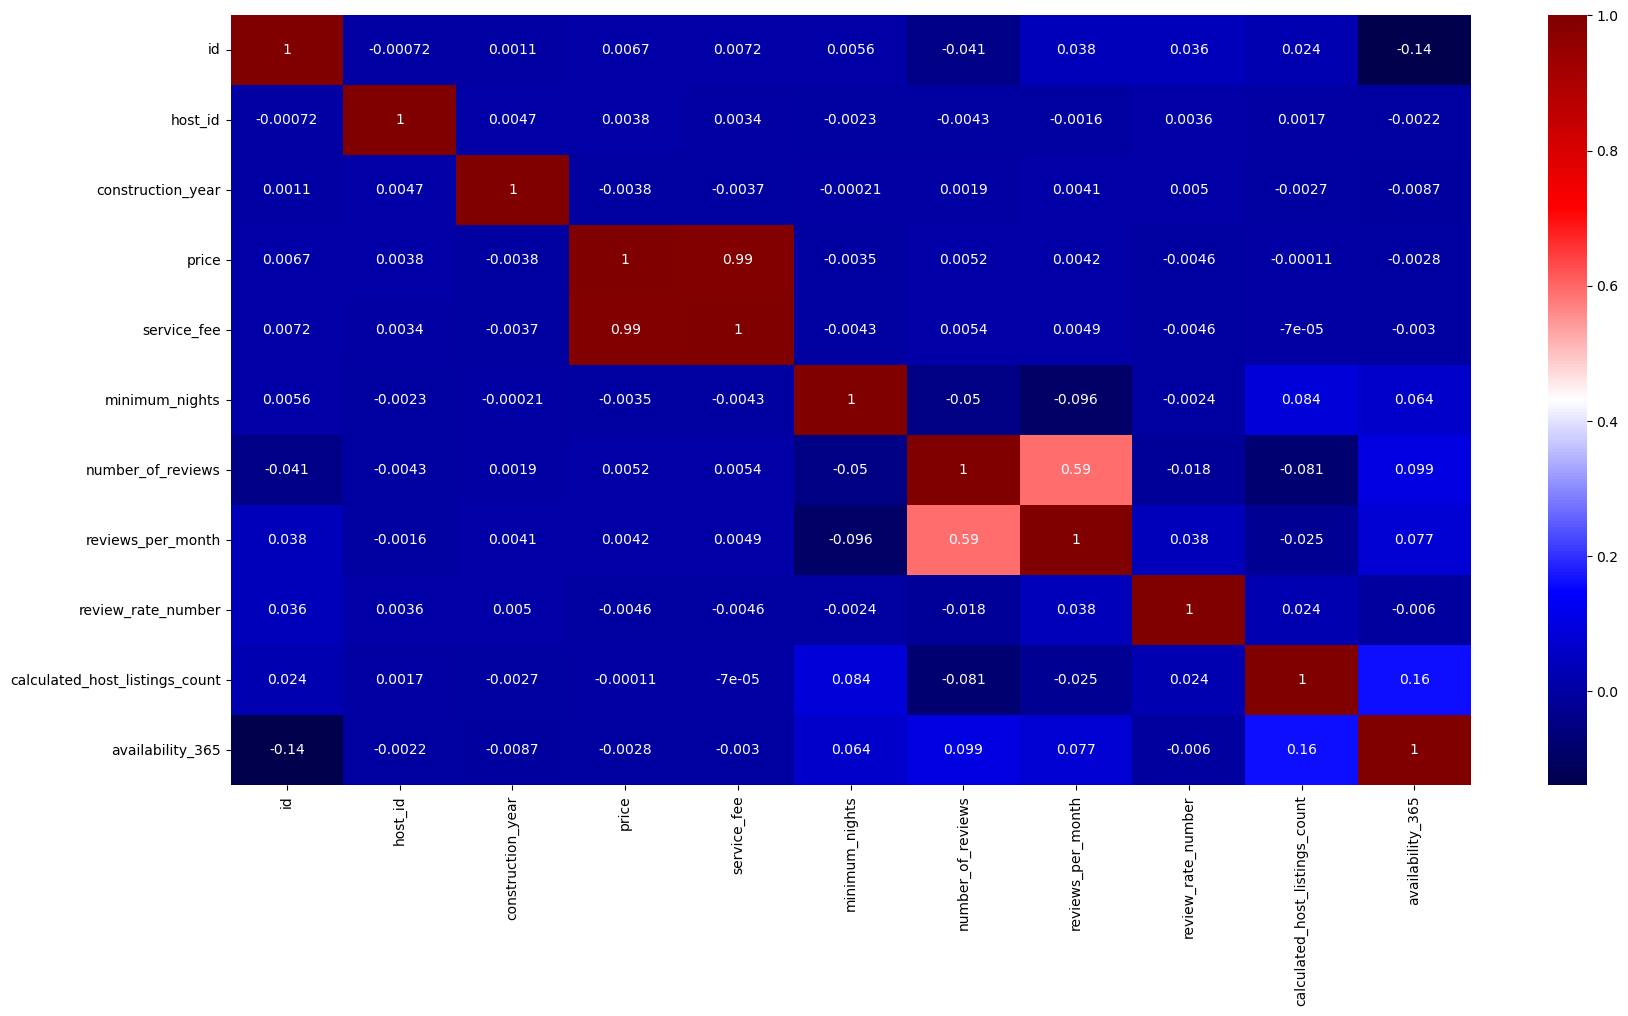

In [36]:
#  correlation heatmap.

plot.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot = True, cmap = "seismic")

reviews_per_month and number_of_reviews are having a moderate high correlated relationship

In [37]:
df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'borough', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules'],
      dtype='object')

## plot most of the combinations and check for any relationships/trend with the target columns which is price

<Axes: xlabel='availability_365', ylabel='price'>

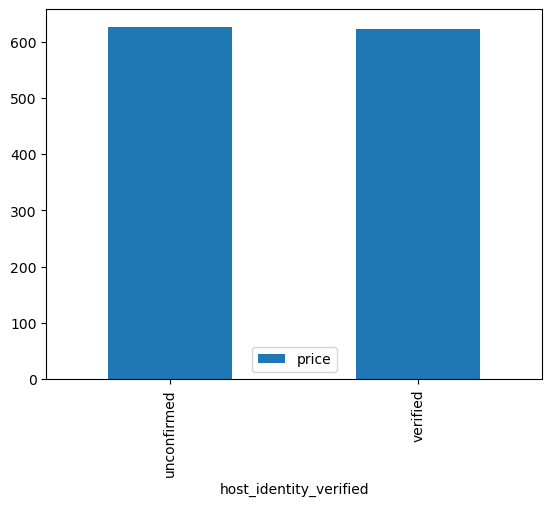

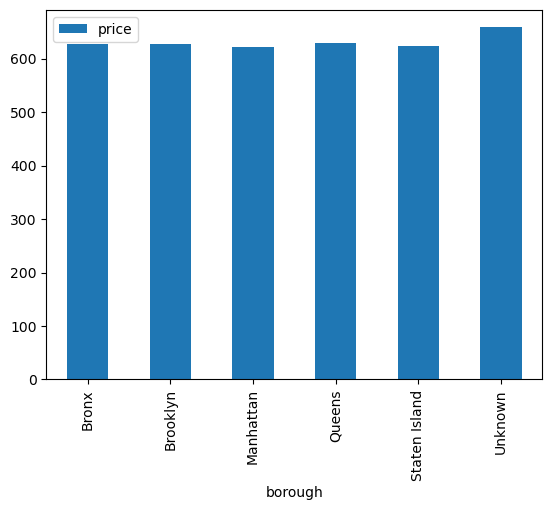

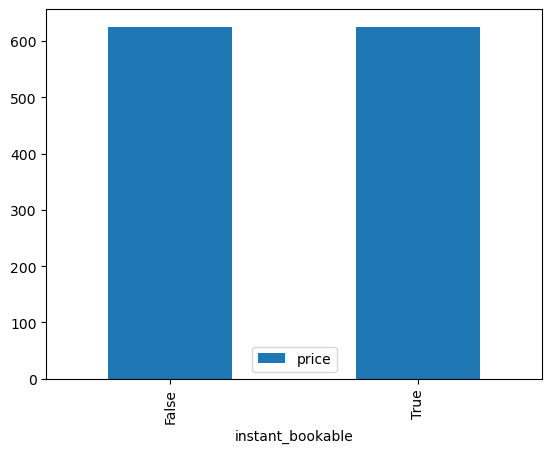

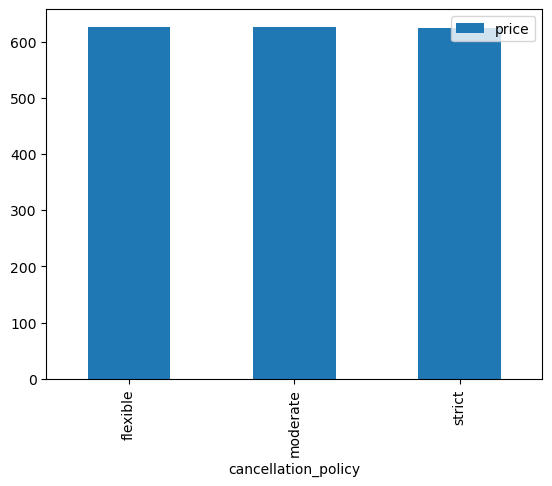

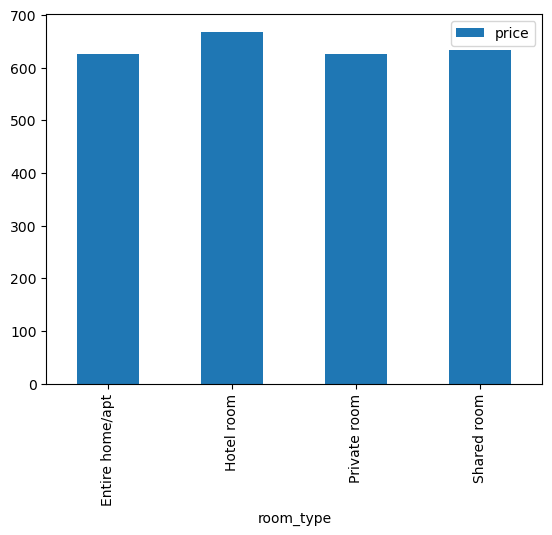

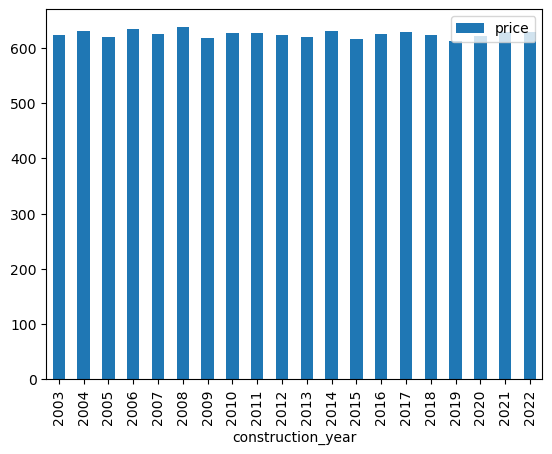

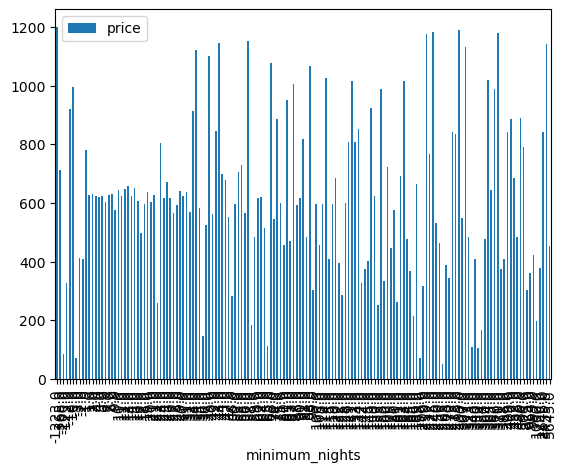

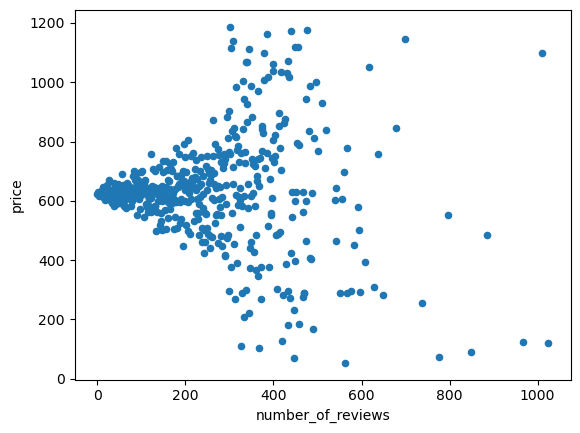

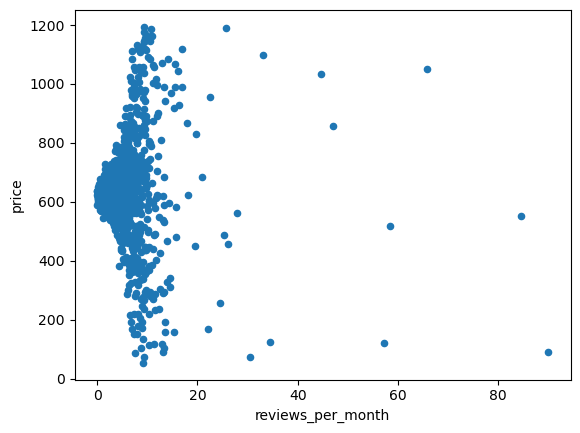

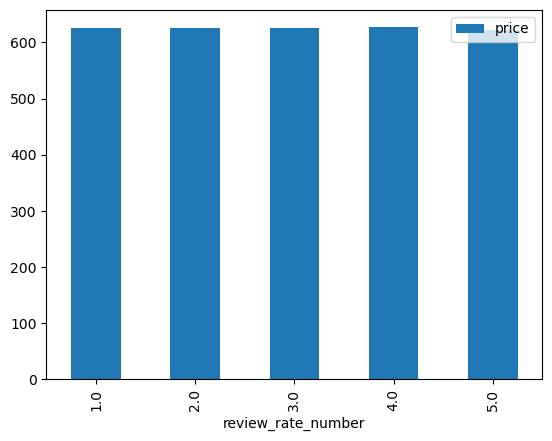

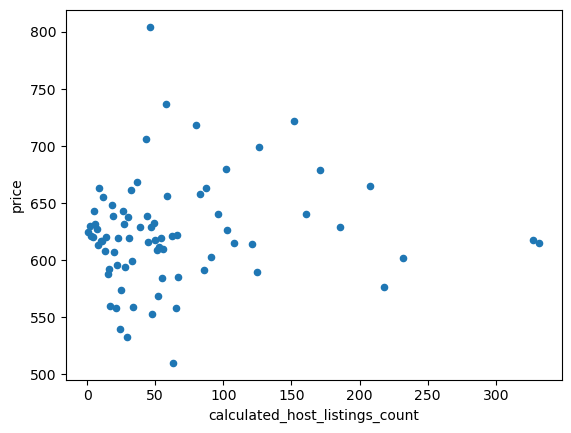

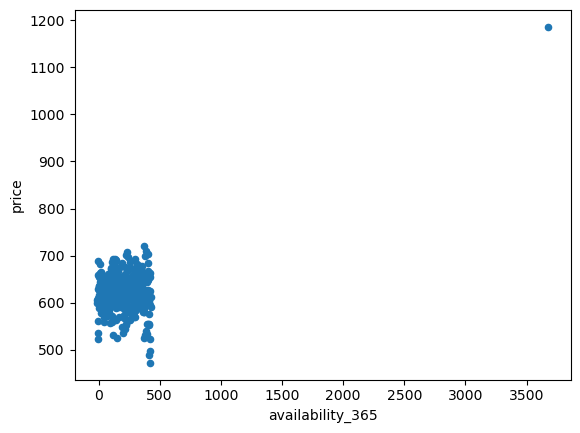

In [38]:
host_identity_verified  = df[["host_identity_verified", "price"]].groupby("host_identity_verified").mean().reset_index()
host_identity_verified.plot(kind = "bar", x= "host_identity_verified")

borough  = df[["borough", "price"]].groupby("borough").mean().reset_index()
borough.plot(kind = "bar", x= "borough")

instant_bookable  = df[["instant_bookable", "price"]].groupby("instant_bookable").mean().reset_index()
instant_bookable.plot(kind = "bar", x= "instant_bookable")

cancellation_policy  = df[["cancellation_policy", "price"]].groupby("cancellation_policy").mean().reset_index()
cancellation_policy.plot(kind = "bar", x= "cancellation_policy")

room_type  = df[["room_type", "price"]].groupby("room_type").mean().reset_index()
room_type.plot(kind = "bar", x= "room_type")

construction_year  = df[["construction_year", "price"]].groupby("construction_year").mean().reset_index()
construction_year.plot(kind = "bar", x= "construction_year")

minimum_nights = df[["minimum_nights", "price"]].groupby("minimum_nights").mean().reset_index()
minimum_nights.plot(kind = "bar", x= "minimum_nights")

number_of_reviews  = df[["number_of_reviews", "price"]].groupby("number_of_reviews").mean().reset_index()
number_of_reviews.plot.scatter(x= "number_of_reviews", y="price")

reviews_per_month  = df[["reviews_per_month", "price"]].groupby("reviews_per_month").mean().reset_index()
reviews_per_month.plot.scatter(x= "reviews_per_month", y="price")

review_rate_number  = df[["review_rate_number", "price"]].groupby("review_rate_number").mean().reset_index()
review_rate_number.plot(kind = "bar", x= "review_rate_number")

calculated_host_listings_count  = df[["calculated_host_listings_count", "price"]].groupby("calculated_host_listings_count").mean().reset_index()
calculated_host_listings_count.plot.scatter(x= "calculated_host_listings_count", y="price")

availability_365  = df[["availability_365", "price"]].groupby("availability_365").mean().reset_index()
availability_365.plot.scatter(x= "availability_365", y="price")

It looks like all of the data are evenly distributed by visualizing it in a way of mean price. 

But there is still something we can observe from the graph For example: 

1.majority of the listing are having 0-200 number of reviews & the prices would always below $800.  

2.majority of the listing are having 0-15 reviews_per_month

"minimum_nights" and "availability_365" having an unobservable output. Lets process the data to see the relationship


<Axes: xlabel='minimum_nights', ylabel='price'>

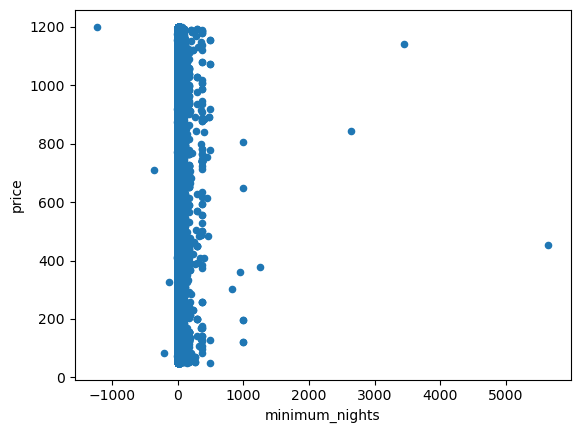

In [39]:
# use scatter plot to see the huge range gap data. 
df.plot.scatter("minimum_nights","price")

A "day" counter for a year could not be negative value and more than 366 days. Lets check the percentage for these outliers.  

In [40]:
df.minimum_nights.value_counts(normalize=True).mul(100).round(1).astype(str).head(10) + "%"

1.0     24.9%
2.0     23.1%
3.0     15.8%
30.0    11.4%
4.0      6.5%
5.0      5.9%
7.0      4.0%
6.0      1.5%
14.0     1.1%
10.0     0.9%
Name: minimum_nights, dtype: object

The outliers for "minimum_nights" are not even hitting 1% of the overall data. 

so, we replace all the outliers with null values. 

In [41]:
df.loc[df.minimum_nights<0, "minimum_nights"] = pd.NA
df.loc[df.minimum_nights>30, "minimum_nights"] = pd.NA

<Axes: xlabel='minimum_nights'>

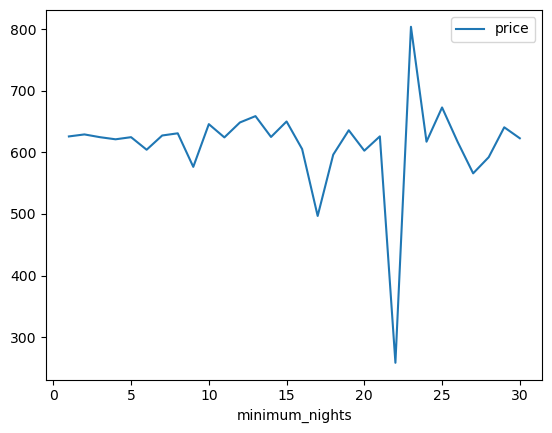

In [42]:
minimum_nights = df[["minimum_nights", "price"]].groupby("minimum_nights").mean().reset_index()
minimum_nights.plot(x= "minimum_nights", y= "price")

The graph now is observable now!!! 

From the observation, we can see that a huge mean price spike between 20-25 minimum_nights.

similar with minimum_nights, so we use same method to apply on availability_365

In [43]:
# similar with minimum_nights, so we use same method
df.availability_365.value_counts(normalize=True).mul(100).round(1).astype(str).head(10) + "%"

0      23.0%
365     2.5%
364     1.1%
89      0.7%
1       0.7%
179     0.7%
90      0.7%
5       0.6%
3       0.6%
180     0.5%
Name: availability_365, dtype: object

In [44]:
df.loc[df.availability_365<0, "availability_365"] = pd.NA
df.loc[df.availability_365>366, "availability_365"] = pd.NA

<Axes: xlabel='availability_365'>

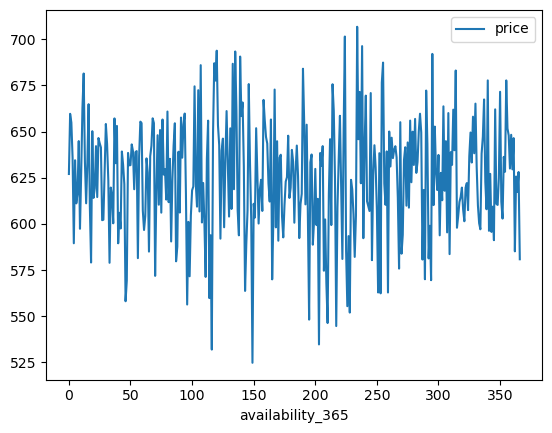

In [45]:
availability_365 = df[["availability_365", "price"]].groupby("availability_365").mean().reset_index()
availability_365.plot(x= "availability_365", y= "price")

The mean price for availability_365 are having a big spike all the time... not much insight that we can extract from this graph. 

### After a raw exploration on the data, lets do deeper EDA in a way of Q&A 

------------------------------------------------------------------------------------------------------

### Q:Will different boroughs have different prices for different room types?


To check the relationship between the combination of Borough, room type and price. 

In [46]:
# mean price group by borough and room type. 
# lets see the price of each type of room in different places
borough_mean = df.groupby(['borough', 'room_type'])['price'].mean().round(2)
borough_mean

borough        room_type      
Bronx          Entire home/apt    620.23
               Private room       634.71
               Shared room        600.26
Brooklyn       Entire home/apt    626.90
               Hotel room         736.12
               Private room       625.87
               Shared room        634.32
Manhattan      Entire home/apt    623.15
               Hotel room         681.87
               Private room       620.36
               Shared room        632.52
Queens         Entire home/apt    627.03
               Hotel room         433.25
               Private room       631.81
               Shared room        645.31
Staten Island  Entire home/apt    642.19
               Private room       603.50
               Shared room        715.60
Unknown        Entire home/apt    692.80
               Private room       639.22
Name: price, dtype: float64

<Axes: title={'center': 'Borough and roomtype into Mean Price'}, xlabel='borough,room_type', ylabel='Price'>

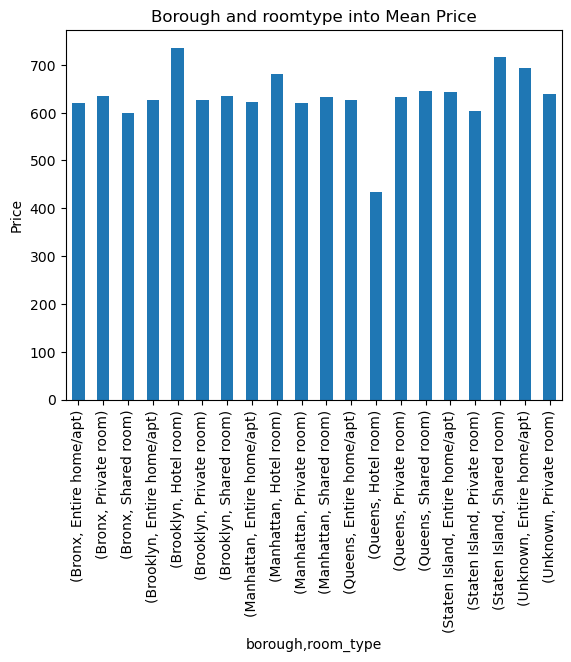

In [47]:
# bar chart for borough + room type with y label as mean price
plot.title("Borough and roomtype into Mean Price") 
plot.xlabel("Borough and roomtype")
plot.ylabel("Price")
borough_mean.plot.bar()
# Brooklyn's Hotel are most expensive, followed by Staten Island's shared room. 
# meanwhile Queens's Hotel room are having the cheapest price. 

In [48]:
# from the previous exploration. 
print(borough)
print(room_type)

         borough       price
0          Bronx  627.766359
1       Brooklyn  626.561078
2      Manhattan  622.436508
3         Queens  630.207647
4  Staten Island  624.490546
5        Unknown  658.357143
         room_type       price
0  Entire home/apt  625.082232
1       Hotel room  668.465517
2     Private room  625.007363
3      Shared room  634.132101


### A: Yes

Brooklyn’s Hotel room would have the most expensive mean prices which is $736.12
compared to others but meanwhile, Staten Island’s Shared room have the highest prices.

Besides that, Queens has the significantly lowest prices for hotel rooms but:

● it has the highest mean prices compared to “Bronx, Brooklyn, Manhattan, and Staten Island”.

● Hotel room was having the highest mean price compared to other rooms.

------------------------------------------------------------------------------------------------------

### Q: What is the percentages of room types in this NewYork Airbnb dataset.

Entire home/apt    52.3
Private room       45.4
Shared room         2.2
Hotel room          0.1
Name: room_type, dtype: float64

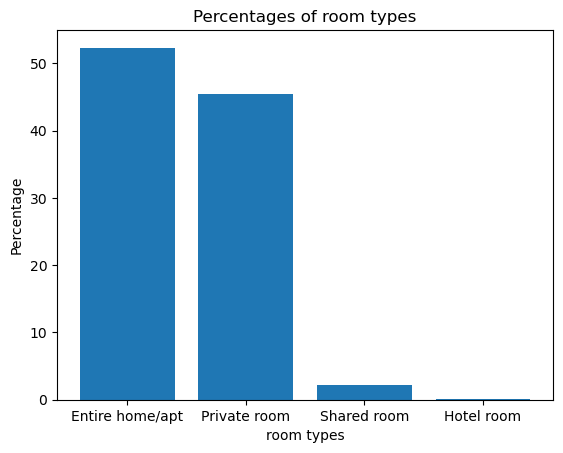

In [49]:
# percentages of room types
room_types = df.room_type.value_counts(normalize=True).mul(100).round(1)
plot.title("Percentages of room types")
plot.xlabel("room types")
plot.ylabel("Percentage")
plot.bar(room_types.index, room_types)
room_types

### A: Majority "Entire home/apt", closely followed by "Private room", very low offer of "Shared room" and "Hotel room"

------------------------------------------------------------------------------------------------------

### Q: Cancellation policies distributed percentages in New York Airbnb dataset.

([<matplotlib.patches.Wedge at 0x237043e0be0>,
 [Text(0.5449497598928221, 0.9555259071279836, 'moderate'),
  Text(-1.099960758422291, -0.009291390157488172, 'strict'),
  Text(0.5530014664854193, -0.9508887306435889, 'flexible')],
 [Text(0.29724532357790295, 0.5211959493425364, '33.50%'),
  Text(-0.5999785955030678, -0.005068030994993548, '33.27%'),
  Text(0.3016371635375014, -0.5186665803510485, '33.23%')])

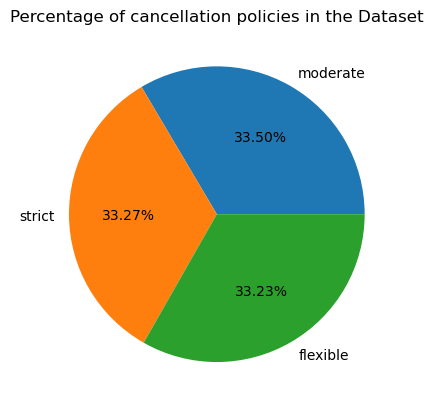

In [50]:
# since the mean price is quite close to each other, Lets see whether 
# the cancellation policies are also evenly distributed as well..
cancellation_policy = df.cancellation_policy.value_counts()
cancellation_policy
plot.title("Percentage of cancellation policies in the Dataset")
plot.pie(cancellation_policy, autopct='%.2f%%', labels = cancellation_policy.index)

### A: Cancellation policies are evenly distributed

------------------------------------------------------------------------------------------------------

### Q: What is the percentage of review_rate in the dataset and will the review rate number affect the airbnb prices?

([<matplotlib.patches.Wedge at 0x2370436a350>,
 [Text(0.8286510846425963, 0.7234206106551352, '5.0'),
  Text(-0.6042417997197903, 0.9191799864397554, '4.0'),
  Text(-0.9941043326773097, -0.4709103691279274, '3.0'),
  Text(0.32070849762174647, -1.052210083373659, '2.0'),
  Text(1.0563356709337435, -0.3068467863819958, '1.0')],
 [Text(0.4519915007141434, 0.3945930603573464, '22.85%'),
  Text(-0.32958643621079464, 0.501370901694412, '22.82%'),
  Text(-0.5422387269148962, -0.2568602013425058, '22.75%'),
  Text(0.17493190779367987, -0.5739327727492685, '22.59%'),
  Text(0.5761830932365872, -0.16737097439017953, '9.00%')])

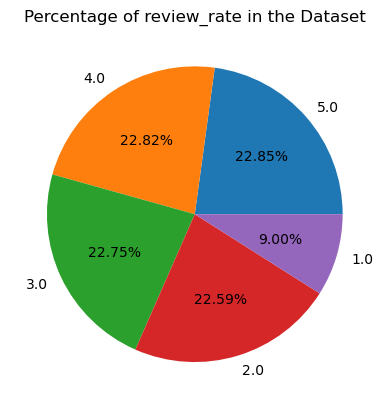

In [51]:
# Lets have a look on review rate numbers
# review rate number is like a rating star features. 

# lets see how they are distributed and the relationship with price. 
review_rate = df.review_rate_number.value_counts()
plot.title("Percentage of review_rate in the Dataset")
plot.pie(review_rate, autopct='%.2f%%', labels = review_rate.index)


In [52]:
# they are evenly distributed except for rating "1". 
# see relationship with price. 
review_rate_number

,review_rate_number,price
0,1.0,626.679556
1,2.0,626.587250
2,3.0,626.123993
3,4.0,626.764034
4,5.0,621.527501


### A: review rate numbers are evenly distributed except for the lowest rating "1" which only have 9.00%  
###      YES, it will affect the prices. The highest rating, "5" has the lowest mean price. 

------------------------------------------------------------------------------------------------------

### Q: Which borough has the highest review rate number.

In [53]:
review_rate_number_borough = df.groupby("borough")["review_rate_number"].mean().sort_values()
review_rate_number_borough

borough
Unknown          3.153846
Brooklyn         3.259176
Manhattan        3.276809
Queens           3.331034
Bronx            3.332961
Staten Island    3.406977
Name: review_rate_number, dtype: float64

Text(0, 0.5, 'Review rate number')

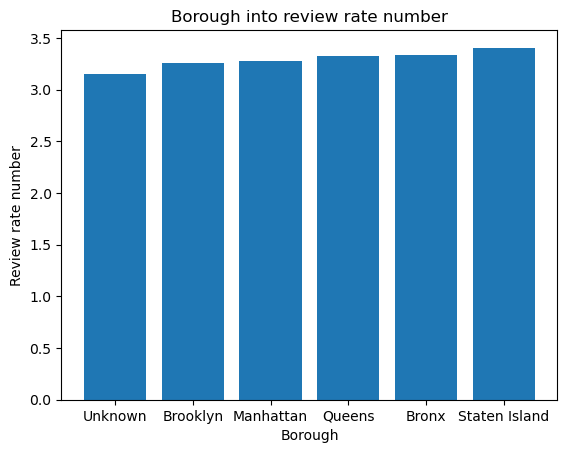

In [54]:
plot.bar(review_rate_number_borough.index, review_rate_number_borough)
plot.title("Borough into review rate number");
plot.xlabel("Borough")
plot.ylabel("Review rate number")

### A: Staten Island has the highest review rating and Brooklyn has the lowest rating.

------------------------------------------------------------------------------------------------------

### Q: Which room type has the highest review rate number.

In [55]:
review_rate_number_room_type = df.groupby("room_type")["review_rate_number"].mean().sort_values()
review_rate_number_room_type

room_type
Entire home/apt    3.275066
Private room       3.282026
Shared room        3.310267
Hotel room         3.534483
Name: review_rate_number, dtype: float64

Text(0, 0.5, 'Review rate number')

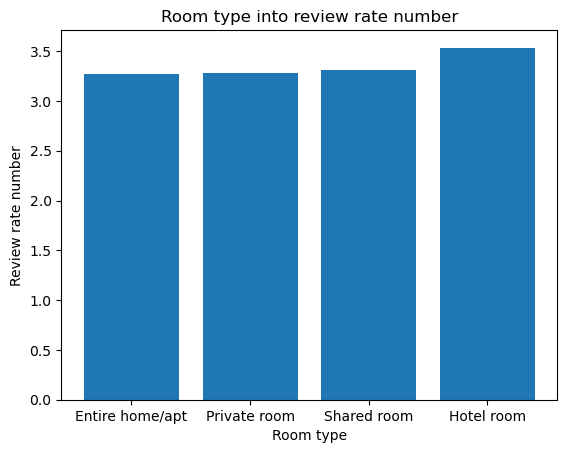

In [56]:
plot.bar(review_rate_number_room_type.index, review_rate_number_room_type)
plot.title("Room type into review rate number");
plot.xlabel("Room type")
plot.ylabel("Review rate number")

### A: Hotel rooms have the highest review rating.

------------------------------------------------------------------------------------------------------

### Q: Which year of construction has the highest accommodations.

In [57]:
construction_year_quantity = df.groupby("construction_year").construction_year.count().to_frame()
construction_year_quantity = construction_year_quantity.rename(columns={"construction_year":"quantity"})
construction_year_quantity

,quantity
construction_year,
2003,5109
2004,5023
2005,5123
2006,5207
2007,5096
2008,5216
2009,5158
2010,5146
2011,5049


Text(0, 0.5, 'Quantity')

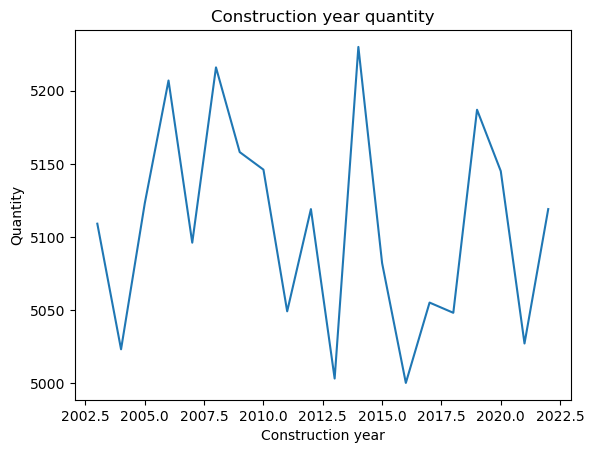

In [58]:
plot.plot(construction_year_quantity)
plot.title("Construction year quantity");
plot.xlabel("Construction year")
plot.ylabel("Quantity")

### A: 2014 is the construction year with the highest number of accommodations available and 2016 is the construction year with the lowest accommodations available.

------------------------------------------------------------------------------------------------------

### Q: What is the relationship between the price and service fee? 

We do not know the relationship between these 2 prices. 

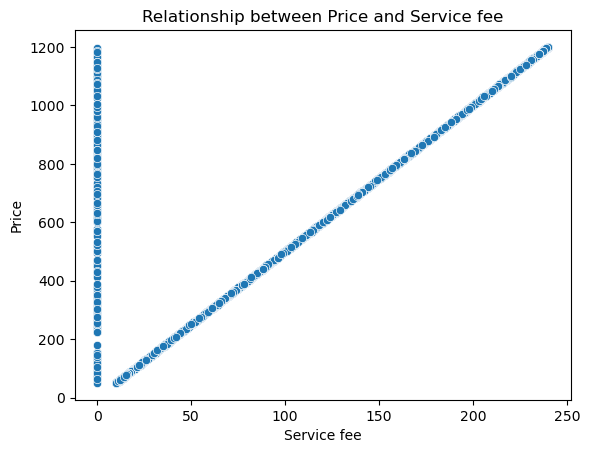

In [59]:
plot.title("Relationship between Price and Service fee")
plot.xlabel("Service fee")
plot.ylabel("Price")
sns.scatterplot(x= df.service_fee, y= df.price);

From the observation in scatter plot, the price is increasing gradiently like a linear relationship. 

The vertical line on x=0 is because we fill the null value in service fee with 0. So we can ignore it. 

In [60]:
# the scatter graph seems like service fee and price have a strong relationship 
# correlation between price and service fee 
df["price"].corr(df["service_fee"])

0.9940465562511123

In [61]:
# it is near to +1 correlation. service fee should be representing
# a fixed percentage of the price. 
round(((df.service_fee / df.price) * 100).mean(),2)

19.95

### A: service fee representing 20% of the price of an airbnb listing.

------------------------------------------------------------------------------------------------------

# **Data preprocessing**
a. remove null values

In [62]:
df.drop_duplicates(inplace=True)

In [63]:
df.shape

(101811, 20)

In [64]:
print("Total columns before dropping : ", len(df.columns), "\n")
print("Columns with more than 50% missing values: ")
print(df.columns[df.isnull().mean() > 0.5], "\n")
df = df.drop(df.columns[df.isnull().mean() > 0.5], axis=1)
print("Total columns after dropping:", len(df.columns))

Total columns before dropping :  20 

Columns with more than 50% missing values: 
Index(['house_rules'], dtype='object') 

Total columns after dropping: 19


We dropped the "house_rules" column from the dataset due to it having more than 50% missing values. The dataset originally contained 20 columns, but after dropping the "house_rules" column, it contained 19 columns. We made this decision after considering the reasons for missing data and whether imputation or other techniques could be used instead. By removing the "house_rules" column, we were able to mitigate the impact of missing values on our results.

In [65]:
df.isnull().sum().sort_values()

id                                    0
host_id                               0
service_fee                           0
price                                 0
borough                               0
room_type                             0
cancellation_policy                  71
instant_bookable                    100
number_of_reviews                   183
construction_year                   210
name                                247
host_identity_verified              285
review_rate_number                  319
calculated_host_listings_count      319
host_name                           399
minimum_nights                     2091
availability_365                   3588
reviews_per_month                 15791
last_review                       15806
dtype: int64

In [66]:
df = df.dropna(subset=['name','host_identity_verified'])
df = df.dropna(subset=['cancellation_policy'])
df = df.dropna(subset=['instant_bookable', 'host_name','construction_year'])

In [67]:
df.shape

(100632, 19)

247 row deleted from name

285 row deleted from host identity verified

71 row deleted from cancellation policy

100 row deleted from instant bookable

387 row deleted from host name

210 row deleted from Construction year


In [68]:
df['availability_365'].describe()

count       97151.0
mean     134.694846
std      129.878678
min             0.0
25%             2.0
50%            90.0
75%           255.0
max           366.0
Name: availability_365, dtype: Float64

In [69]:
df = df[df['availability_365'] <= 366]

Make sure that the data in feature’availability_365’] is all under 366 (including the lunar year)

In [70]:
df['availability_365'].describe()

count       97151.0
mean     134.694846
std      129.878678
min             0.0
25%             2.0
50%            90.0
75%           255.0
max           366.0
Name: availability_365, dtype: Float64

In [71]:
df.isnull().sum().sort_values()

id                                    0
service_fee                           0
price                                 0
room_type                             0
cancellation_policy                   0
instant_bookable                      0
construction_year                     0
host_name                             0
host_identity_verified                0
host_id                               0
name                                  0
borough                               0
availability_365                      0
number_of_reviews                   126
review_rate_number                  262
calculated_host_listings_count      282
minimum_nights                     1946
reviews_per_month                 14776
last_review                       14778
dtype: int64

In [72]:
df["number_of_reviews"].fillna(df["number_of_reviews"].median(), inplace=True)
df["review_rate_number"].fillna(df["review_rate_number"].median(), inplace=True)
df["reviews_per_month"].fillna(df["reviews_per_month"].mean(),inplace=True)
df["minimum_nights"].fillna(df["minimum_nights"].mean(),inplace=True)
df["calculated_host_listings_count"].fillna(df["calculated_host_listings_count"].mean(),inplace=True)

We use the median and mean to fill in all the missing values of these features

In [73]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [74]:
# fill null values in the "last review" column
num_days = 10
g = df['last_review'].notna().cumsum()
days = pd.to_timedelta(df.groupby(g).cumcount().mul(num_days), unit='d')
df['last_review'] = df['last_review'].ffill().add(days)

First we convert the "last_review" column to a datetime format using the pd.to_datetime() function. Then fills the missing values in the "last_review" column by forward-filling the previous value (i.e. using the most recent valid value to fill missing values) and adding an offset of 10 days for each missing value. This is done using the ffill() and add() methods from Pandas.
The idea behind adding an offset of 10 days for each missing value is to create a plausible value for each missing date based on the assumption that the reviews are happening regularly every 10 days. 

In [75]:
df.isnull().sum().sort_values()

id                                0
review_rate_number                0
reviews_per_month                 0
last_review                       0
number_of_reviews                 0
minimum_nights                    0
service_fee                       0
price                             0
calculated_host_listings_count    0
construction_year                 0
cancellation_policy               0
instant_bookable                  0
borough                           0
host_name                         0
host_identity_verified            0
host_id                           0
name                              0
room_type                         0
availability_365                  0
dtype: int64

**All the null values has been solved!!**

### ii. Label Encoding

In [76]:
df['host_identity_verified'].value_counts()

unconfirmed    48610
verified       48541
Name: host_identity_verified, dtype: int64

In [77]:
le = LabelEncoder()
host_identity_verified_le = LabelEncoder()
df['host_identity_verified'] = host_identity_verified_le.fit_transform(df['host_identity_verified'])

In [78]:
df['host_identity_verified'].value_counts()
# unconfirmed --> 0 , verified --> 1

0    48610
1    48541
Name: host_identity_verified, dtype: int64

We use the LabelEncoder() function for the feature ‘host_identity_verified’ from the scikit-learn library. This function replaces the two unique values in the column, "unconfirmed" and "verified", with numerical values 0 and 1 respectively.

In [79]:
df['instant_bookable'].value_counts()

False    48837
True     48314
Name: instant_bookable, dtype: int64

In [80]:
le = LabelEncoder()
instant_bookable_le = LabelEncoder()
df['instant_bookable'] = instant_bookable_le.fit_transform(df['instant_bookable'])
df['instant_bookable'].value_counts()
# False --> 0 , True --> 1 

0    48837
1    48314
Name: instant_bookable, dtype: int64

Using the same method to convert the feature ‘instant_bookable’ to “False (0)” and “True (1)”

In [81]:
df.select_dtypes('object')

,name,host_name,borough,cancellation_policy,room_type
0,Clean & quiet apt home by the park,Madaline,Brooklyn,strict,Private room
1,Skylit Midtown Castle,Jenna,Manhattan,moderate,Entire home/apt
4,Entire Apt: Spacious Studio/Loft by central park,Lyndon,Manhattan,moderate,Entire home/apt
7,BlissArtsSpace!,Emma,Brooklyn,moderate,Private room
8,Large Furnished Room Near B'way,Evelyn,Manhattan,strict,Private room
...,...,...,...,...,...
102037,Bx Apartment,Vii,Bronx,strict,Private room
102038,HUGE BEDROOM LORIMER L TRAIN!!!,Jose,Brooklyn,flexible,Private room
102039,Spacious two bedrooms condo in upper Manhattan,Max,Manhattan,moderate,Entire home/apt
102040,"Room in Queens, NY, near LGA.",Sonia,Queens,strict,Private room


In [82]:
df['cancellation_policy'].value_counts()

moderate    32499
strict      32357
flexible    32295
Name: cancellation_policy, dtype: int64

In [83]:
le = LabelEncoder()
cancellation_policy_le = LabelEncoder()
df['cancellation_policy'] = cancellation_policy_le.fit_transform(df['cancellation_policy'])
df['cancellation_policy'].value_counts()
# moderate --> 1 , strict --> 2 , flexible --> 0

1    32499
2    32357
0    32295
Name: cancellation_policy, dtype: int64

Using the same method to convert the feature ‘cancellation_policy’ to “moderate (1)”, “strict (2)”, “flexible (0)”

In [84]:
df['room_type'].value_counts()

Entire home/apt    50793
Private room       44124
Shared room         2119
Hotel room           115
Name: room_type, dtype: int64

In [85]:
le = LabelEncoder()
room_type_le = LabelEncoder()
df['room_type'] = room_type_le.fit_transform(df['room_type'])
df['room_type'].value_counts()
# Hotel room --> 1 , Private room --> 2 , Entire home/apt --> 0 , Shared room --> 3

0    50793
2    44124
3     2119
1      115
Name: room_type, dtype: int64

Using the same method to convert the feature ‘cancellation_policy’ to “Hotel room (1)” , “Private room (2)”, ” Entire home/apt (0)” , “Shared room (3)”

In [86]:
df['borough'].value_counts()

Manhattan        41292
Brooklyn         39595
Queens           12737
Bronx             2605
Staten Island      914
Unknown              8
Name: borough, dtype: int64

In [87]:
le = LabelEncoder()
borough_le = LabelEncoder()
df['borough'] = borough_le.fit_transform(df['borough'])
df['borough'].value_counts()
# Brooklyn --> 1 , Manhattan --> 2 , Bronx --> 0 , Queens --> 3 , Staten Island --> 4 

2    41292
1    39595
3    12737
0     2605
4      914
5        8
Name: borough, dtype: int64

Using the same method to convert the feature ‘cancellation_policy’ to “Brooklyn (1)”, “Manhattan (2)” , “Bronx (0)” , “Queens (3)” , “Staten Island (4)“, “Unknown (5)”

In [88]:
df.select_dtypes('object')

,name,host_name
0,Clean & quiet apt home by the park,Madaline
1,Skylit Midtown Castle,Jenna
4,Entire Apt: Spacious Studio/Loft by central park,Lyndon
7,BlissArtsSpace!,Emma
8,Large Furnished Room Near B'way,Evelyn
...,...,...
102037,Bx Apartment,Vii
102038,HUGE BEDROOM LORIMER L TRAIN!!!,Jose
102039,Spacious two bedrooms condo in upper Manhattan,Max
102040,"Room in Queens, NY, near LGA.",Sonia


In [89]:
df.select_dtypes(include=['datetime64'])

,last_review
0,2021-10-19
1,2022-05-21
4,2018-11-19
7,2017-10-05
8,2019-06-24
...,...
102037,2017-10-31
102038,2019-04-30
102039,2019-05-23
102040,2019-06-29


In [90]:
# convert the "last_review" column to a numeric representation
df['last_review_numeric'] = pd.to_datetime(df['last_review']).apply(lambda x: x.timestamp())

# drop the original "last_review" column if desired
df.drop('last_review', axis=1, inplace=True)

The purpose of converting the "last_review" column to a numeric representation is to make it easier to perform calculations and analysis on the dates. Unix timestamps are a commonly used format for representing dates in software and can be compared and manipulated easily using numerical operations.

In [91]:
df.select_dtypes(include=['datetime64'])

""
0
1
4
7
8
...
102037
102038
102039
102040


# **Data Spliting**

In [92]:
split_data = df.copy()

In [93]:
split_data.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'borough', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365',
       'last_review_numeric'],
      dtype='object')

In [94]:
split_data[['host_identity_verified', 'borough', 'instant_bookable', 'cancellation_policy', 'room_type', 'construction_year', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365', 'service_fee']].describe()

,host_identity_verified,borough,instant_bookable,cancellation_policy,room_type,construction_year,price,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,service_fee
count,97151.000000,97151.000000,97151.000000,97151.000000,97151.000000,97151.0,97151.000000,97151.000000,97151.000000,97151.000000,97151.000000,97151.000000,97151.0,97151.000000
mean,0.499645,1.688979,0.497308,1.000638,0.974977,2012.490803,625.871139,6.561882,27.122346,1.392923,3.285555,8.073925,134.694846,124.876162
std,0.500002,0.766530,0.499995,0.815773,1.031327,5.763153,331.675832,9.286774,48.895408,1.622818,1.277817,32.743704,129.878678,66.525451
min,0.000000,0.000000,0.000000,0.000000,0.000000,2003.0,50.000000,1.000000,0.000000,0.010000,1.000000,1.000000,0.0,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,2008.0,340.000000,2.000000,1.000000,0.290000,2.000000,1.000000,2.0,68.000000
50%,0.000000,2.000000,0.000000,1.000000,0.000000,2012.0,626.000000,3.000000,7.000000,1.070000,3.000000,1.000000,90.0,125.000000
75%,1.000000,2.000000,1.000000,2.000000,2.000000,2017.0,914.000000,5.000000,30.000000,1.750000,4.000000,2.000000,255.0,183.000000
max,1.000000,5.000000,1.000000,2.000000,3.000000,2022.0,1200.000000,30.000000,1024.000000,90.000000,5.000000,332.000000,366.0,240.000000


In [95]:
split_data = split_data[['host_identity_verified', 'borough',
       'instant_bookable', 'cancellation_policy','room_type',  
      'construction_year','minimum_nights', 'number_of_reviews',
        'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365','price','service_fee']]

In [96]:
split_data.head()

,host_identity_verified,borough,instant_bookable,cancellation_policy,room_type,construction_year,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,price,service_fee
0,0,1,0,2,2,2020,10.000000,9.0,0.21,4.0,6.0,286,966.0,193.0
1,1,2,0,1,0,2007,30.000000,45.0,0.38,4.0,2.0,228,142.0,28.0
4,1,2,0,1,0,2009,10.000000,9.0,0.10,3.0,1.0,289,204.0,41.0
7,0,1,0,1,2,2009,6.561882,49.0,0.40,5.0,1.0,219,1060.0,212.0
8,1,2,1,2,2,2005,2.000000,430.0,3.47,3.0,1.0,180,1018.0,204.0


In [97]:
#save the processed data into csv called processed_data.csv
#split_data.to_csv('processed_data.csv', index=False)

#### So the reason that we save the processed data is for later deployment testing! In this case u can use the actual value of the features and try to see if the deployed model could predict the correct price~

In [98]:
# Separate the input features from the target variable
X = split_data.drop('price', axis=1)
y = split_data['price']

In [99]:
# Split the data into training and testing sets using an 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# 25 % --> test
# 75 % --> train

Split the data into training and testing sets using an 75:25 ratio

# **Modeling**

In [100]:
def plot_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    df1 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
    plot.figure(figsize=(15,8))
    plot.plot(df1[:20])
    plot.legend(['Actual' , 'Predicted'])

 **i. Linear Discriminant Analysis**

In [101]:
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
ldav = lda.score(X_train,y_train)
ldav

0.06925325611078326

In [102]:
lda.score(X_test , y_test)

0.037549407114624504

In [103]:
lda.intercept_

array([  71.8878578 ,   69.92251287,  118.21991676, ..., -391.30440077,
       -463.6751333 , -489.87998277])

LDA is a supervised learning technique that is commonly used for classification problems. It seeks to find a linear combination of features that best separates the classes in the data. In this code block, LDA is a model that has been trained on the training data using LDA.

The score() method is used to evaluate the performance of the model on the training data and testing data, respectively. The score is the mean accuracy of the model on the given data.

The output shows that the mean accuracy of the model on the training data is 0.069, which means that the model correctly classifies only about 6.9% of the training data. The mean accuracy on the testing data is even lower at 0.0375, indicating that the model is not generalising well to new data.


In [104]:
lda.coef_

array([[-1.02131581e-01, -1.74969297e-01,  1.18020072e-01, ...,
        -1.86537464e-03,  1.31888874e-03, -2.25355184e+00],
       [ 3.04130344e-01, -5.02535197e-02,  1.16606775e-01, ...,
         5.74185437e-03,  2.56904841e-04, -2.25153099e+00],
       [ 3.63730407e-02, -6.65164189e-02,  3.60951113e-02, ...,
        -9.06958397e-04,  2.64827466e-03, -2.25140678e+00],
       ...,
       [-3.72374237e-02, -2.56947821e-01,  3.39327896e-01, ...,
        -8.54066707e-03, -1.09631840e-03,  2.26131300e+00],
       [-1.90138553e-01, -1.08847619e-01,  1.83085051e-01, ...,
        -3.59596192e-03, -1.94504747e-03,  2.26086833e+00],
       [ 1.27185181e-01, -2.21445972e-01,  1.01019551e-01, ...,
        -7.39173882e-03,  1.77136134e-03,  2.26264373e+00]])

In [105]:
y_pred = lda.predict(X_test)
df1 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df1.head(10)

,Y_test,Y_pred
69608,1152.0,1141.0
13542,539.0,543.0
88985,138.0,151.0
70099,422.0,470.0
71702,713.0,707.0
48933,278.0,311.0
92193,515.0,523.0
36189,85.0,78.0
96649,977.0,985.0
79648,1129.0,1124.0


The output is a table with two columns: Y_test and Y_pred. Y_test contains the actual target values from the test set, and Y_pred contains the predicted target values from the Linear Discriminant Analysis model. Each row represents a data point from the test set.

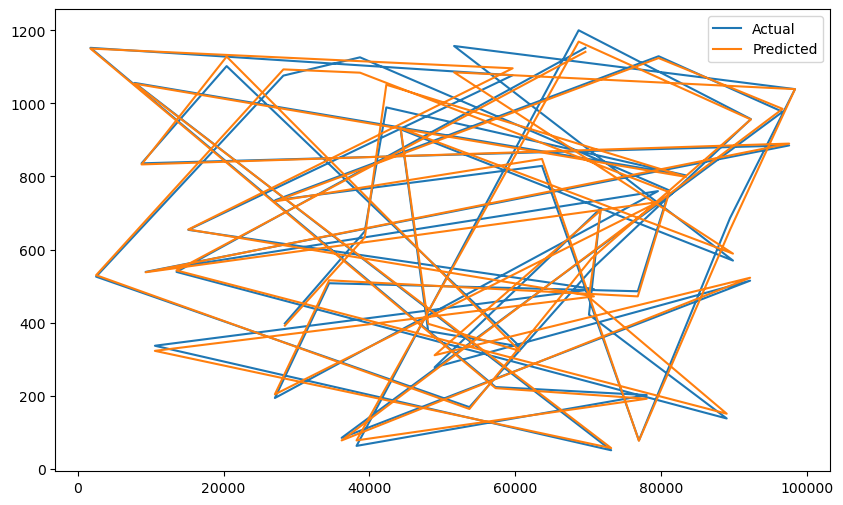

In [106]:
plot.figure(figsize=(10,6))
plot.plot(df1[:50])
plot.legend(['Actual' , 'Predicted'])

The graph shows that the predicted line is almost similar to the actual line.

**Evaluation of Linear Discriminant Analysis**

In [107]:
lda_score = r2_score(y_test , y_pred)
lda_score

0.9884759818570558

 LDA model has a high level of accuracy in predicting the dependent variable

In [108]:
mse = mean_squared_error(y_test , y_pred)
mse

1260.1669548748353

In [109]:
mae = mean_absolute_error(y_test , y_pred)
mae

13.768074769433465

In [110]:
mpae= mean_absolute_percentage_error(y_test,y_pred)
mpae

0.03502870490844998

In [111]:
reg_mse = mean_squared_error(y_test,y_pred)
reg_rmse= np.sqrt(reg_mse)
reg_rmse

35.49883033108042

Mean Squared Error (MSE) is a metric used to measure the difference between predicted and actual values. It measures the average of the squared differences between predicted and actual values. In this case, the MSE is 1260.16, which means that on average, the squared difference between the predicted and actual values is 1260.16.

The mean absolute error (MAE) is a measure of the difference between two continuous variables. In this case, it measures the average absolute difference between the predicted and actual price values in the test set. The MAE value of 13.76 indicates that on average, the predicted price values are off by about $13.76 from the actual price values in the test set.

The mean absolute percentage error (MAPE) is a measure of the accuracy of a prediction model, calculated as the average absolute percentage difference between the actual and predicted values. In this case, the MAPE is 0.035, which indicates that, on average, the predictions are off by about 3.5percent of the actual value.

The calculated value of reg_rmse is 35.49. This is the root mean squared error (RMSE) of the predictions made by the linear discriminant analysis (LDA) model on the test data set. It represents the square root of the average of the squared differences between the predicted and actual values. In this case, the RMSE tells us that, on average, the predictions made by the LDA model are off by about 35.49 units


**ii. Random Forest Regressor**

In [112]:
rf = RandomForestRegressor().fit(X_train, y_train)
rfv = rf.score(X_train,y_train)
rfv

0.9996371007607185

RandomForestRegressor(), one of the most popular machine learning libraries in Python, is a class in scikit-learn. The Random Forest Regressor algorithm is implemented in this class.
 
fit() method trains the model on the training data and returns a trained Random Forest Regressor model. x_train represents the input data (also called features) whereas y_train represents the target variable that the model will predict. ‘.fit(x_train, y_train)’ fits the model to the training data.

rf.score(x_train,y_train) calculates the R-squared coefficient of determination score of the trained model on the training data, which is a measure of how well the model fits the training data. This method returns the R-squared score, which ranges from 0 to 1, with 1 being the best possible score.

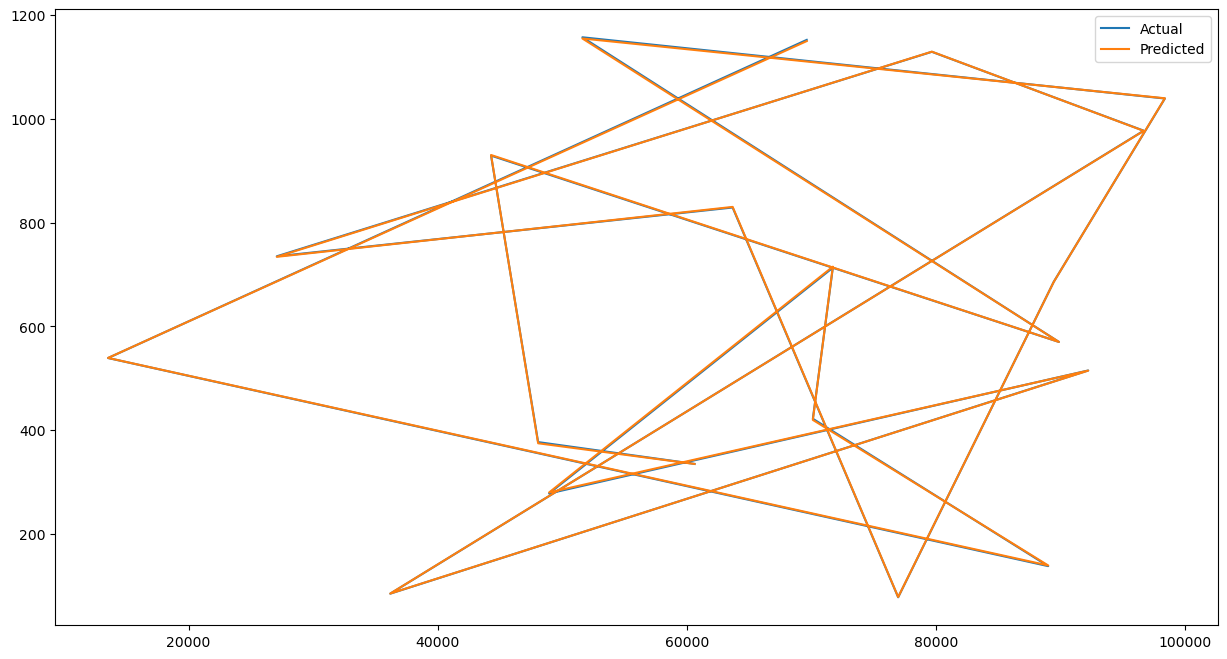

In [113]:
plot_predictions(rf, X_test, y_test)

In [114]:
print(rf.score(X_train , y_train))
print(rf.score(X_test , y_test))

0.9996371007607185
0.9978131273745015


The score of training and testing are compared.

In [115]:
y_pred = rf.predict(X_test)

**Evaluation RandomForest Regressor**


In [116]:
rf_score = r2_score(y_test , y_pred)
rf_score

0.9978131273745015

**iii. Ridge Regression**

In [117]:
rid = linear_model.Ridge(alpha=0.4)
rid.fit(X_train , y_train)
ridv = rid.score(X_train , y_train)
ridv

0.9884833545203835

Ridge regression is a linear regression method that uses L2 regularisation to prevent overfitting. The regularisation parameter alpha controls the strength of the regularisation penalty. A larger value of alpha leads to a stronger penalty and a simpler model, while a smaller value of alpha leads to a weaker penalty and a more complex model.

Ridge regression model is trained on the training data x_train and y_train using an L2 regularisation penalty with a regularisation parameter of alpha=0.4.

rid.fit(x_train, y_train) trains the Ridge regression model on the training data x_train and y_train, and updates the model parameters to minimise the regularised mean squared error loss function.
A higher score indicates a better fit of the model to the data, in this case 0.9884833545203835 is a good fit of the model to the data.

In [118]:
print(rid.score(X_train , y_train))
print(rid.score(X_test , y_test))

0.9884833545203835
0.9895627321272462


The accuracy of training and testing are compared. The score is high on both the training and test data, indicating a good fit of the model to the data.

In [119]:
print(rid.intercept_)
print(rid.coef_)

11.797576334343375
[-1.71790673e-01  7.74912896e-02 -1.35489541e-01 -2.60020830e-02
  2.77375141e-01 -2.66639975e-03  6.80644397e-02 -2.07417396e-04
 -8.03338910e-02  2.88331978e-02 -4.61703667e-03 -4.47920198e-04
  4.95636958e+00]


’rid.intercept_’ returns the intercept of the trained Ridge regression model, while the ‘rid.coef_ ‘returns the coefficients of the input features. 
The intercept represents the value of the target variable when all the input features are zero. The coefficients represent the change in the target variable corresponding to a unit change in each input feature, holding all other input features constant.

In [120]:
pd.DataFrame(rid.coef_ , split_data.columns[:-1] , columns=['Coeficient'])
y_pred = rid.predict(X_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df.head(10)

,Y_test,Y_pred
69608,1152.0,1146.855433
13542,539.0,542.392394
88985,138.0,145.351849
70099,422.0,424.620720
71702,713.0,715.727751
48933,278.0,283.889643
92193,515.0,516.815156
36189,85.0,90.960853
96649,977.0,973.302158
79648,1129.0,1126.765398


The table shows the coefficient value for each input feature and the DataFrame showing the actual target values and the predicted target values for the first 10 rows of the test data.

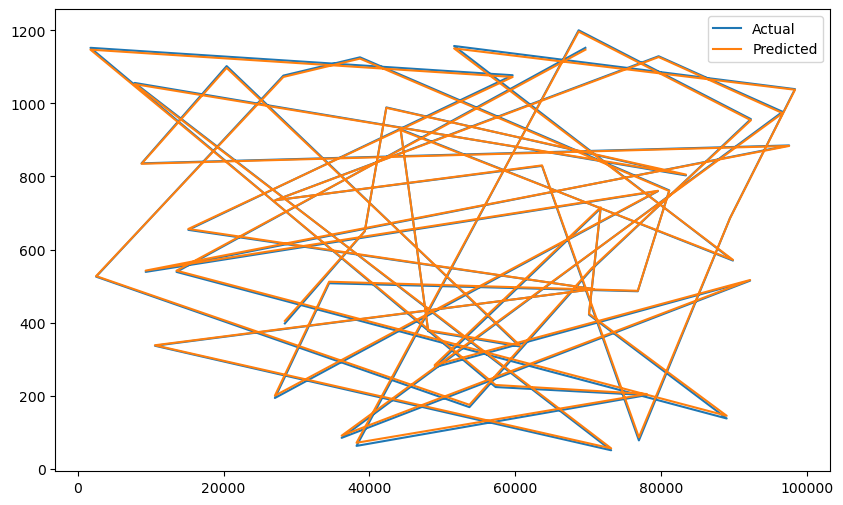

In [121]:
plot.figure(figsize=(10,6))
plot.plot(df[:50])
plot.legend(['Actual' , 'Predicted'])

Evaluation of Ridge Regression

In [122]:
rid_score = r2_score(y_test , y_pred)
rid_score

0.9895627321272462

rf_score is close to 1 therefore it means that the model is doing a good job of predicting the target variable values for the test set.

In [123]:
mse = mean_squared_error(y_test , y_pred)
mse

1141.3293444417168

**iv. AdaBoostClassifier**

In [124]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create an AdaBoostClassifier with DecisionTreeClassifier as the base estimator
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)

In [125]:
# Fit the AdaBoostClassifier on the training data
ada_boost.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [126]:
# Predict the class labels for the testing data
y_pred = ada_boost.predict(X_test)

In [127]:
# Print the accuracy score of the AdaBoostClassifier on the testing data
accuracy = ada_boost.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.0184864953886693


In [128]:
dtclf = DecisionTreeClassifier(max_depth=1, criterion='gini',
                               random_state=1)
dtclf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

dtclf_train_sc = accuracy_score(y_train, dtclf.predict(X_train))
dtclf_test_sc = accuracy_score(y_test, dtclf.predict(X_test))
print('Decision tree train/test accuracies %.3f/%.3f' % (dtclf_train_sc, dtclf_test_sc))

adaclf = AdaBoostClassifier(base_estimator=dtclf,
                            n_estimators=50,
                            learning_rate=0.5,
                            algorithm='SAMME.R',
                            random_state=1)
#SAMME

adaclf.fit(X_train, y_train)

adaclf_train_sc = accuracy_score(y_train, adaclf.predict(X_train))
adaclf_test_sc = accuracy_score(y_test, adaclf.predict(X_test))
print('AdaBoost train/test accuracies %.3f/%.3f' % (adaclf_train_sc, adaclf_test_sc))

Decision tree train/test accuracies 0.003/0.002


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost train/test accuracies 0.044/0.041


In [129]:
j = list(range(10, 31, 5))
w = []

 #Sample a smaller subset of the data for training and testing
n_samples = 10000
x_train1 = X_train[:n_samples]
y_train1 = y_train[:n_samples]
x_test1 = X_test[:n_samples]
y_test1 = y_test[:n_samples]

for i in j:
  adaclf = AdaBoostClassifier(base_estimator=dtclf,
                              n_estimators=i,
                              learning_rate=0.5,
                              algorithm='SAMME.R',
                              random_state=1)
  
  adaclf.fit(x_train1, y_train1)
  adaclf_test_sc = accuracy_score(y_test1, adaclf.predict(x_test1))
  w.append(adaclf_test_sc)

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


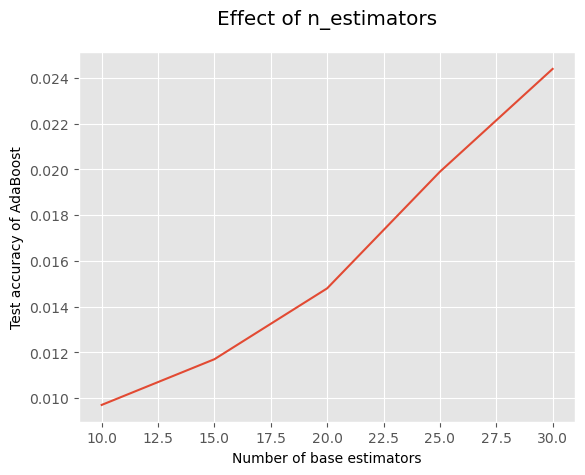

In [130]:
plot.style.use('ggplot')

plot.title("Effect of n_estimators", pad=20)
plot.xlabel("Number of base estimators")
plot.ylabel("Test accuracy of AdaBoost")
plot.plot(j, w)

In [131]:
j = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
w = []

# Sample a smaller subset of the data for training and testing
n_samples = 10000
x_train2 = X_train[:n_samples]
y_train2 = y_train[:n_samples]
x_test2 = X_test[:n_samples]
y_test2 = y_test[:n_samples]

for i in j:
  adaclf = AdaBoostClassifier(base_estimator=dtclf,
                              n_estimators=10,
                              learning_rate=i,
                              algorithm='SAMME.R',
                              random_state=1)
  
  adaclf.fit(x_train2, y_train2)
  adaclf_test_sc = accuracy_score(y_test2, adaclf.predict(x_test2))
  w.append(adaclf_test_sc)

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-package

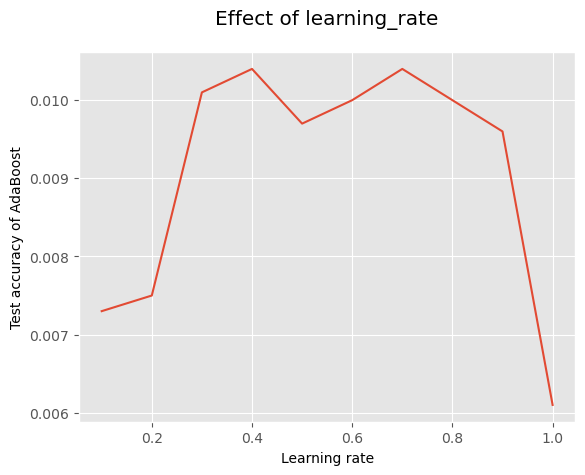

In [132]:
plot.title("Effect of learning_rate", pad=20)
plot.xlabel("Learning rate")
plot.ylabel("Test accuracy of AdaBoost")
plot.plot(j, w)

**v.Gradient Boosting Regressor**

In [133]:
# Create a Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

In [134]:
# Training the model
gbr.fit(X_train, y_train)
gbrv = gbr.score(X_train, y_train)
gbrv

0.9979731504498771

In [135]:
# Making predictions on the testing set
y_pred = gbr.predict(X_test)

In [136]:
# Calculating the mean squared error of the predictions
mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 260.0500584158588


The R-squared value ranges from 0 to 1, with higher values indicating a better fit between the model and the data. In this case, the R-squared value of **0.9979731504498771** suggests that the model **fits the training data very well.**

The predict method is then used to generate predictions on a testing set, and the mean_squared_error and mean_absolute_error functions are used to calculate the mean squared error and mean absolute error, respectively, between the predicted values and the actual values in the testing set.

The mean squared error (MSE) measures the average squared difference between the predicted and actual values, with lower values indicating better performance. In this case, the MSE of **257.9392065538066** suggests that the model's predictions have an average squared difference of around **257.94** from the actual values in the testing set.

In [137]:
mae = mean_absolute_error(y_test , y_pred)
print("Mean absolute error: ", mae)


Mean absolute error:  2.710430671193828


In [138]:
mpae= mean_absolute_percentage_error(y_test,y_pred)
print("Mean absolute percentage error: ", mpae)

Mean absolute percentage error:  0.008333533725080427


In [139]:
reg_mse = mean_squared_error(y_test,y_pred)
reg_rmse= np.sqrt(reg_mse)
print("Mean squared error: ", reg_rmse)

Mean squared error:  16.126067667471162


The mean absolute error (MAE) measures the average absolute difference between the predicted and actual values, with lower values indicating better performance. In this case, the MAE of 2.7079312812719905 suggests that the model's predictions have an average absolute difference of around 2.71 from the actual values in the testing set.

The mean_absolute_percentage_error function calculates the mean absolute percentage error (MAPE) between the predicted and actual values in the testing set. The MAPE is a percentage-based metric that measures the average absolute difference between the predicted and actual values as a percentage of the actual values. In this case, the MAPE of 0.00831641461602672 suggests that the model's predictions have an average absolute percentage difference of around 0.008% from the actual values in the testing set.

The mean_squared_error function is used again to calculate the mean squared error (MSE) between the predicted and actual values, and the np.sqrt function is used to calculate the square root of the MSE, which gives the root mean squared error (RMSE). The RMSE measures the average squared difference between the predicted and actual values, but is expressed in the same units as the original data. In this case, the RMSE of 16.06048587539638 suggests that the model's predictions have an average difference of around 16.06 from the actual values in the testing set.

# Compare 5 models performance

In [140]:
dic = {'Linear Discriminant Analysis':ldav,'RandomForest Regressor':rfv,'Ridge Regression':ridv,
'AdaBoostClassifier':adaclf_test_sc,'Gradient Boosting Regressor':gbrv}

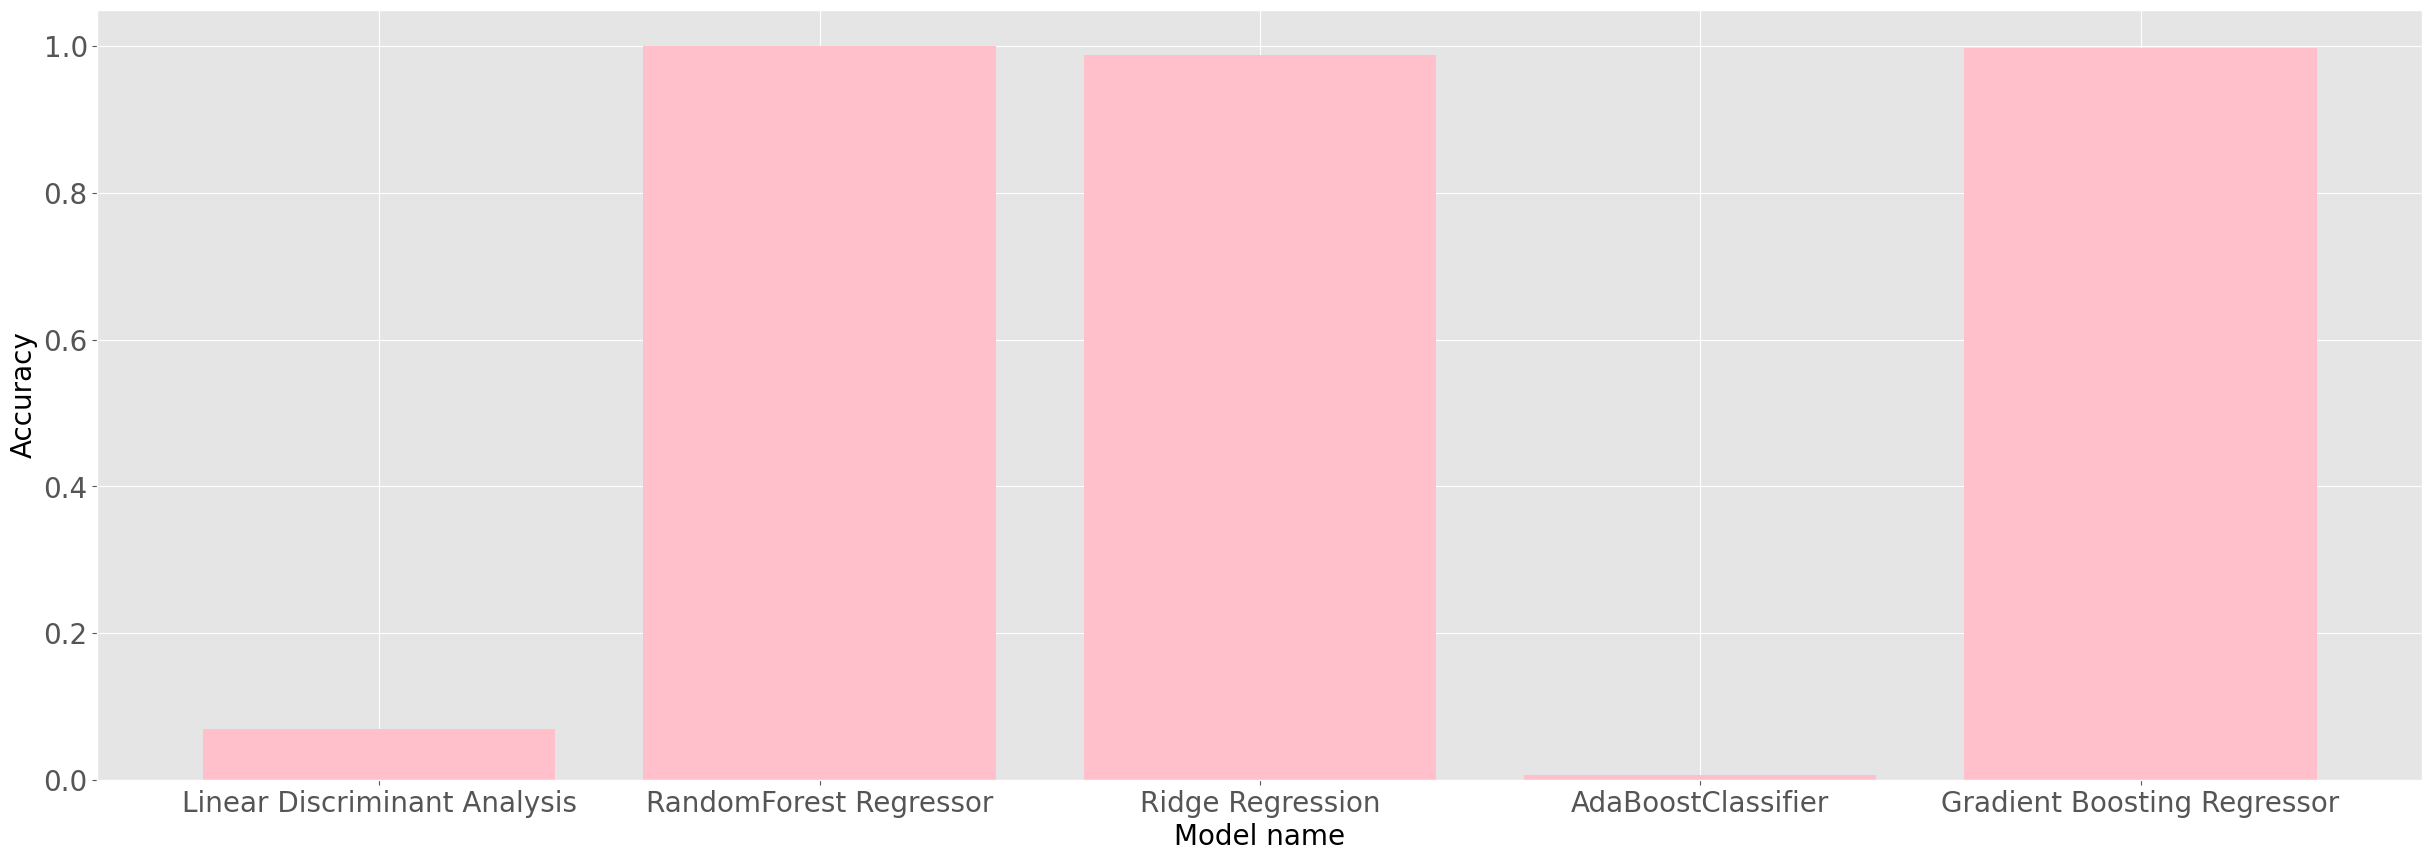

In [141]:
names = list(dic.keys())
values = list(dic.values())
plot.rc('font', size=20)

plot.figure(figsize=(30,10))
plot.xlabel('Model name')
plot.ylabel('Accuracy')

plot.bar(range(len(dic)), values, tick_label=names,color='pink')
plot.show()

Using the accuracy collected from each model, we implement the plotting function from ‘matplotlib.pyplot’ to plot the bar chart to clearly indicate the ranks of the accuracy of each model. As you can see, the top 3 models' accuracy is Random Forest Regressor, Gradient Boosting Algorithm and Ridge Regression. On the other hand, linear discriminant analysis and AdaboostClassifier is clearly not performing well on this dataset.

In [142]:
# Create the second dataframe for accuracy scores
dict1 = {'Linear Discriminant Analysis': ldav,
       'Random Forest Regressor': rfv,
       'Ridge Regression': ridv,
       'AdaBoostClassifier':adaclf_test_sc,
       'Gradient Boosting Regressor': gbrv}

df4 = pd.DataFrame.from_dict(dict1, orient='index', columns=['Accuracy'])
df4 = df4.sort_values('Accuracy', ascending=False)
print(df4)

                              Accuracy
Random Forest Regressor       0.999637
Gradient Boosting Regressor   0.997973
Ridge Regression              0.988483
Linear Discriminant Analysis  0.069253
AdaBoostClassifier            0.006100


We can see that the **Random Forest Regressor** has the **highest Accuracy score**, indicating that it is the **best-performing model** on this dataset. The **Gradient Boosting Regressor** has a **second highesh Accuracy score**, making it a strong performer as well. The **Ridge Regression and Linear Discriminant Analysis models** have **lower accuracy scores**, indicating that they do not fit the data as well and have **lower predictive performance**. Finally, the **AdaBoost Classifier** has the **lowest accuracy score**, suggesting that it is the **worst-performing model** on this dataset.

# Parameter Tunning

So we decided to take the model Linear Discriminant Analysis(Ranking=4) and Random Forest Regressor (Ranking=1) to do hyperparameter tunning, hoping the accuracy will be higher after this process.

### i.Linear Discriminant Analysis (LDA) Parameter Tuning:

In [143]:
pipeline = Pipeline([
    ('clf', LinearDiscriminantAnalysis())
])

In [144]:
parameters = {
    'clf__solver': ['svd', 'lsqr', 'eigen']
}

In [145]:
grid_search = GridSearchCV(pipeline, parameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf', LinearDiscriminantAnalysis())]),
             param_grid={'clf__solver': ['svd', 'lsqr', 'eigen']})

So the reason we chose the LDA model to perform parameter tuning is because that the adjusted R2 value is showing good results of the model, so we assume that the default parameter of the model is not suitable for the dataset. 

In [146]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'clf__solver': 'svd'}
Best cross-validation score: 0.04


In [147]:
# Define the hyperparameters to tune and their search space
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': ['auto', None]
}

In [148]:
# Define the performance metric to use
scoring = 'accuracy'


In [149]:
# Define the model
model = LinearDiscriminantAnalysis()

In [150]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'clf__solver': 'svd'}
Best cross-validation score: 0.04


In [151]:
# Train the model on the entire training dataset
pipeline.fit(X_train, y_train)

Pipeline(steps=[('clf', LinearDiscriminantAnalysis())])

In [152]:
# Make predictions on the validation dataset
y_pred = pipeline.predict(X_test)

In [153]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy: {:.2f}".format(accuracy))

Validation Accuracy: 0.04


In [154]:
# Create a Linear Discriminant Analysis object with the best hyperparameters found
lda = LinearDiscriminantAnalysis(solver='lsqr')

In [155]:
# Fit the model on the training set
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(solver='lsqr')

After the machine has found the best parameter for the model we try to fit the model again with the best parameter.

In [156]:
# Make predictions on the testing set
y_pred = lda.predict(X_test)

In [157]:
# Evaluate the model using accuracy score
acc = accuracy_score(y_test, y_pred)

In [158]:
# Print the accuracy score
print("Accuracy Score:", acc)

Accuracy Score: 0.037467061923583664


#### The accuracy score before the parameter tuning is: 0.037549407114624504

#### The accuracy score after the parameter tuning is : 0.037467061923583664

We can notice that the accuracy score **before parameter tuning is higher accuracy score then after parameter tuning**. So we can assume that the **default** parameter is the **best parameter** for the dataset.

### ii.Random Forest Regressor Parameter Tuning

In [159]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [160]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


The reason that we chose this model to perform parameter tuning is because the model performance accuracy and adjusted R2 value is showing outstanding results. So we tried parameter tuning to see if the model has the potential to hit better results in accuracy and adjusted R2 value.

In [161]:
rf2 = RandomForestRegressor(random_state=42)

In [162]:
rf_Grid = GridSearchCV(estimator = rf2, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [163]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [164]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 64}

In [165]:
print("The best parameters are %s with a score of %0.2f"
      % (rf_Grid.best_params_, rf_Grid.best_score_))

The best parameters are {'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 64} with a score of 0.99


In [166]:
cv_results = pd.DataFrame(rf_Grid.cv_results_)
print(cv_results[['params', 'mean_test_score']])

                                                params  mean_test_score
0    {'bootstrap': True, 'max_depth': 2, 'max_featu...         0.932299
1    {'bootstrap': True, 'max_depth': 2, 'max_featu...         0.932251
2    {'bootstrap': True, 'max_depth': 2, 'max_featu...         0.932462
3    {'bootstrap': True, 'max_depth': 2, 'max_featu...         0.932535
4    {'bootstrap': True, 'max_depth': 2, 'max_featu...         0.932522
..                                                 ...              ...
315  {'bootstrap': False, 'max_depth': 4, 'max_feat...         0.712452
316  {'bootstrap': False, 'max_depth': 4, 'max_feat...         0.716113
317  {'bootstrap': False, 'max_depth': 4, 'max_feat...         0.711892
318  {'bootstrap': False, 'max_depth': 4, 'max_feat...         0.724560
319  {'bootstrap': False, 'max_depth': 4, 'max_feat...         0.712681

[320 rows x 2 columns]


**Dataframe of Grid search parameters and their Accuracy scores**

Finally, we will be exporting the grid search parameters and their resulting accuracy scores into a dataframe.

In [167]:
cv_results = pd.concat([pd.DataFrame(rf_Grid.cv_results_["params"]),
pd.DataFrame(rf_Grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
cv_results.head()

,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,Accuracy
0,True,2,auto,1,2,10,0.932299
1,True,2,auto,1,2,17,0.932251
2,True,2,auto,1,2,25,0.932462
3,True,2,auto,1,2,33,0.932535
4,True,2,auto,1,2,41,0.932522


groupby() function to segment the data into groups based on the 2 hyperparameters: max_features and n_estimators

In [168]:
grid_contour = cv_results.groupby(['max_features','n_estimators']).mean()
grid_contour

bootstrap  max_depth  min_samples_leaf  \
max_features n_estimators                                           
auto         10                  0.5        3.0               1.5   
             17                  0.5        3.0               1.5   
             25                  0.5        3.0               1.5   
             33                  0.5        3.0               1.5   
             41                  0.5        3.0               1.5   
             48                  0.5        3.0               1.5   
             56                  0.5        3.0               1.5   
             64                  0.5        3.0               1.5   
             72                  0.5        3.0               1.5   
             80                  0.5        3.0               1.5   
sqrt         10                  0.5        3.0               1.5   
             17                  0.5        3.0               1.5   
             25                  0.5        3.0               1.5   
             33                  0.5        3.0               1.5   
             41                  0.5        3.0               1.5   
             48                  0.5        3.0               1.5   
             56                  0.5        3.0               1.5   
             64                  0.5        3.0               1.5   
             72                  0.5        3.0               1.5   
             80                  0.5        3.0               1.5   

                           min_samples_split  Accuracy  
max_features n_estimators                               
auto         10                          3.5  0.961880  
             17                          3.5  0.961868  
             25                          3.5  0.961923  
             33                          3.5  0.961960  
             41                          3.5  0.961955  
             48                          3.5  0.961952  
             56                          3.5  0.961952  
             64                          3.5  0.961983  
             72                          3.5  0.961977  
             80                          3.5  0.961967  
sqrt         10                          3.5  0.638791  
             17                          3.5  0.599688  
             25                          3.5  0.591770  
             33                          3.5  0.581265  
             41                          3.5  0.598285  
             48                          3.5  0.580856  
             56                          3.5  0.588068  
             64                          3.5  0.583204  
             72                          3.5  0.595840  
             80                          3.5  0.582167

In [169]:
# Create a Random Forest Regressor object with the best hyperparameters found
rf2 = RandomForestRegressor(n_estimators=64, max_depth=4, min_samples_split=2, 
                            min_samples_leaf=1, max_features="auto", bootstrap=True)

In [170]:
rf2.fit(X_train, y_train)
rfv2 = rf2.score(X_train,y_train)
rfv2

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


0.9924387629003142

#### Before parameter tuning : 0.9996184723434957
#### After parameter tuning  : 0.992322583956726

We can notice that the accuracy score **before parameter tuning has a higher accuracy score** than **after parameter tuning**. So we can assume that the **default** parameter is the **best parameter** for the dataset.

In [171]:
# Make predictions on the testing set
y_pred = rf.predict(X_test)

In [172]:
rf2_score = r2_score(y_test , y_pred)
rf2_score

0.9978131273745015

#### Before parameter tuning : 0.9976678285803059
#### After parameter tuning    : 0.9976678285803059

We can notice that the accuracy score before parameter tuning and after parameter tuning have the **same accuracy score**. So we can assume that the **default** parameter is the **best parameter** for the dataset.

# Deployment

**1.Random Forest Regressor       0.999604**

**2.Gradient Boosting Regressor   0.997973**

**3.Ridge Regression              0.988483**

**Since that this three models have the top 3 highest accuracy among other models.** 

                                         **Reference**
=======================================================================================================

host_identity_verified- Range between **(0-1)**
#### unconfirmed --> 0 , verified --> 1

borough- Range between **(0-4)**
#### Brooklyn --> 1 , Manhattan --> 2 , Bronx --> 0 , Queens --> 3 , Staten Island --> 4

instant_bookable- Range between **(0-1)**
#### False --> 0 , True --> 1 

cancellation_policy- Range between **(0-2)**
#### moderate --> 1 , strict --> 2 , flexible --> 0

room_type- Range between (0-3)
#### Hotel room --> 1 , Private room --> 2 , Entire home/apt --> 0 , Shared room --> 3

construction_year- Range between **(2003-2022)**

minimum_nights- Range between **(1.000000-30.000000)**

number_of_reviews- Range between **(0.0-1024.0)**

reviews_per_month- Range between **(0.01-90.0)**

review_rate_number- Range between **(1.0-5.0)**

calculated_host_listings_count- Range between **(1.0-332.0)**

availability_365- Range between **(0.0-366.0)**

service_fee- Range between **(0.0-240)**

=======================================================================================================
                                         
                                         **Reference**

**1.Deploy using Random Forest Regressor**

In [173]:
import pickle

# Save the trained model to a file
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [174]:
import tkinter as tk
import pickle

# load the trained model from file
with open('rf_model.pkl', 'rb') as file:
    rfFile = pickle.load(file)
#    ^^^ change this
# create a tkinter window
window = tk.Tk()

# create a function to make predictions and display the result
def predict_price():
    # get the input values from the Entry widgets
    host_identity_verified = float(host_identity_verified_entry.get())
    borough = float(borough_entry.get())
    instant_bookable = float(instant_bookable_entry.get())
    cancellation_policy = float(cancellation_policy_entry.get())
    room_type = float(room_type_entry.get())
    construction_year = float(construction_year_entry.get())
    minimum_nights = float(minimum_nights_entry.get())
    number_of_reviews = float(number_of_reviews_entry.get())
    reviews_per_month = float(reviews_per_month_entry.get())
    review_rate_number = float(review_rate_number_entry.get())
    calculated_host_listings_count = float(calculated_host_listings_count_entry.get())
    availability_365 = float(availability_365_entry.get())
    service_fee = float(service_fee_entry.get())

    # make a prediction using the loaded model
    features = [host_identity_verified, borough, instant_bookable, cancellation_policy, room_type, 
                construction_year, minimum_nights, number_of_reviews, reviews_per_month, review_rate_number, 
                calculated_host_listings_count, availability_365, service_fee]
    price = rfFile.predict([features])[0]
#           ^^^ change this
    # update the label with the predicted price
    price_label.config(text=f"The predicted price of Random Forest Regressor is ${price:.2f}")

# create a label and entry widgets for each feature
tk.Label(window, text="Host Identity Verified:").grid(row=0, column=0)
host_identity_verified_entry = tk.Entry(window)
host_identity_verified_entry.grid(row=0, column=1)

tk.Label(window, text="Borough:").grid(row=1, column=0)
borough_entry = tk.Entry(window)
borough_entry.grid(row=1, column=1)

tk.Label(window, text="Instant Bookable:").grid(row=2, column=0)
instant_bookable_entry = tk.Entry(window)
instant_bookable_entry.grid(row=2, column=1)

tk.Label(window, text="Cancellation Policy:").grid(row=3, column=0)
cancellation_policy_entry = tk.Entry(window)
cancellation_policy_entry.grid(row=3, column=1)

tk.Label(window, text="Room Type:").grid(row=4, column=0)
room_type_entry = tk.Entry(window)
room_type_entry.grid(row=4, column=1)

tk.Label(window, text="Construction Year:").grid(row=5, column=0)
construction_year_entry = tk.Entry(window)
construction_year_entry.grid(row=5, column=1)

tk.Label(window, text="Minimum Nights:").grid(row=6, column=0)
minimum_nights_entry = tk.Entry(window)
minimum_nights_entry.grid(row=6, column=1)

tk.Label(window, text="Number of Reviews:").grid(row=7, column=0)
number_of_reviews_entry = tk.Entry(window)
number_of_reviews_entry.grid(row=7, column=1)

tk.Label(window, text="Reviews per Month:").grid(row=8, column=0)
reviews_per_month_entry = tk.Entry(window)
reviews_per_month_entry.grid(row=8, column=1)

tk.Label(window, text="Review Rate Number:").grid(row=9, column=0)
review_rate_number_entry = tk.Entry(window)
review_rate_number_entry.grid(row=9, column=1)

tk.Label(window, text="Calculated Host Listings Count:").grid(row=10, column=0)
calculated_host_listings_count_entry = tk.Entry(window)
calculated_host_listings_count_entry.grid(row=10, column=1)

tk.Label(window, text="Availability 365:").grid(row=11, column=0)
availability_365_entry = tk.Entry(window)
availability_365_entry.grid(row=11, column=1)

tk.Label(window, text="Service Fee:").grid(row=12, column=0)
service_fee_entry = tk.Entry(window)
service_fee_entry.grid(row=12, column=1)

predict_button = tk.Button(window, text="Predict Price", command=predict_price)
predict_button.grid(row=13, column=0, columnspan=2)

price_label = tk.Label(window, text="")
price_label.grid(row=14, column=0, columnspan=2)

window.mainloop()

**2.Deploy using Gradient Boosting Regressor**

In [175]:
import pickle

# Save the trained Gradient Boosting Regressor model to a file
with open('gbr_model.pkl', 'wb') as file:
    pickle.dump(gbr, file)

In [176]:
import tkinter as tk
import pickle

# load the trained Gradient Boosting Regressor model from file
with open('gbr_model.pkl', 'rb') as file:
    gbrFile = pickle.load(file)
#    ^^^ change this
# create a tkinter window
window = tk.Tk()

# create a function to make predictions and display the result
def predict_price():
    # get the input values from the Entry widgets
    host_identity_verified = float(host_identity_verified_entry.get())
    borough = float(borough_entry.get())
    instant_bookable = float(instant_bookable_entry.get())
    cancellation_policy = float(cancellation_policy_entry.get())
    room_type = float(room_type_entry.get())
    construction_year = float(construction_year_entry.get())
    minimum_nights = float(minimum_nights_entry.get())
    number_of_reviews = float(number_of_reviews_entry.get())
    reviews_per_month = float(reviews_per_month_entry.get())
    review_rate_number = float(review_rate_number_entry.get())
    calculated_host_listings_count = float(calculated_host_listings_count_entry.get())
    availability_365 = float(availability_365_entry.get())
    service_fee = float(service_fee_entry.get())

    # make a prediction using the loaded model
    features = [host_identity_verified, borough, instant_bookable, cancellation_policy, room_type, 
                construction_year, minimum_nights, number_of_reviews, reviews_per_month, review_rate_number, 
                calculated_host_listings_count, availability_365, service_fee]
    price = gbrFile.predict([features])[0]
#           ^^^ change this
    # update the label with the predicted price
    price_label.config(text=f"The predicted price of Gradient Boosting Regressor is ${price:.2f}")

# create a label and entry widgets for each feature
tk.Label(window, text="Host Identity Verified:").grid(row=0, column=0)
host_identity_verified_entry = tk.Entry(window)
host_identity_verified_entry.grid(row=0, column=1)

tk.Label(window, text="Borough:").grid(row=1, column=0)
borough_entry = tk.Entry(window)
borough_entry.grid(row=1, column=1)

tk.Label(window, text="Instant Bookable:").grid(row=2, column=0)
instant_bookable_entry = tk.Entry(window)
instant_bookable_entry.grid(row=2, column=1)

tk.Label(window, text="Cancellation Policy:").grid(row=3, column=0)
cancellation_policy_entry = tk.Entry(window)
cancellation_policy_entry.grid(row=3, column=1)

tk.Label(window, text="Room Type:").grid(row=4, column=0)
room_type_entry = tk.Entry(window)
room_type_entry.grid(row=4, column=1)

tk.Label(window, text="Construction Year:").grid(row=5, column=0)
construction_year_entry = tk.Entry(window)
construction_year_entry.grid(row=5, column=1)

tk.Label(window, text="Minimum Nights:").grid(row=6, column=0)
minimum_nights_entry = tk.Entry(window)
minimum_nights_entry.grid(row=6, column=1)

tk.Label(window, text="Number of Reviews:").grid(row=7, column=0)
number_of_reviews_entry = tk.Entry(window)
number_of_reviews_entry.grid(row=7, column=1)

tk.Label(window, text="Reviews per Month:").grid(row=8, column=0)
reviews_per_month_entry = tk.Entry(window)
reviews_per_month_entry.grid(row=8, column=1)

tk.Label(window, text="Review Rate Number:").grid(row=9, column=0)
review_rate_number_entry = tk.Entry(window)
review_rate_number_entry.grid(row=9, column=1)

tk.Label(window, text="Calculated Host Listings Count:").grid(row=10, column=0)
calculated_host_listings_count_entry = tk.Entry(window)
calculated_host_listings_count_entry.grid(row=10, column=1)

tk.Label(window, text="Availability 365:").grid(row=11, column=0)
availability_365_entry = tk.Entry(window)
availability_365_entry.grid(row=11, column=1)

tk.Label(window, text="Service Fee:").grid(row=12, column=0)
service_fee_entry = tk.Entry(window)
service_fee_entry.grid(row=12, column=1)

predict_button = tk.Button(window, text="Predict Price", command=predict_price)
predict_button.grid(row=13, column=0, columnspan=2)

price_label = tk.Label(window, text="")
price_label.grid(row=14, column=0, columnspan=2)

window.mainloop()

**3.Deploy using the Ridge Regression**

In [177]:
import pickle

# Save the trained Ridge Regression model to a file
with open('rid_model.pkl', 'wb') as file:
    pickle.dump(rid, file)

In [178]:
import tkinter as tk
import pickle

# load the trained Ridge Regression model from file
with open('rid_model.pkl', 'rb') as file:
    ridFile = pickle.load(file)
#    ^^^ change this
# create a tkinter window
window = tk.Tk()

# create a function to make predictions and display the result
def predict_price():
    # get the input values from the Entry widgets
    host_identity_verified = float(host_identity_verified_entry.get())
    borough = float(borough_entry.get())
    instant_bookable = float(instant_bookable_entry.get())
    cancellation_policy = float(cancellation_policy_entry.get())
    room_type = float(room_type_entry.get())
    construction_year = float(construction_year_entry.get())
    minimum_nights = float(minimum_nights_entry.get())
    number_of_reviews = float(number_of_reviews_entry.get())
    reviews_per_month = float(reviews_per_month_entry.get())
    review_rate_number = float(review_rate_number_entry.get())
    calculated_host_listings_count = float(calculated_host_listings_count_entry.get())
    availability_365 = float(availability_365_entry.get())
    service_fee = float(service_fee_entry.get())

    # make a prediction using the loaded model
    features = [host_identity_verified, borough, instant_bookable, cancellation_policy, room_type, 
                construction_year, minimum_nights, number_of_reviews, reviews_per_month, review_rate_number, 
                calculated_host_listings_count, availability_365, service_fee]
    price = ridFile.predict([features])[0]
#           ^^^ change this
    # update the label with the predicted price
    price_label.config(text=f"The predicted price of Ridge Regression is ${price:.2f}")

# create a label and entry widgets for each feature
tk.Label(window, text="Host Identity Verified:").grid(row=0, column=0)
host_identity_verified_entry = tk.Entry(window)
host_identity_verified_entry.grid(row=0, column=1)

tk.Label(window, text="Borough:").grid(row=1, column=0)
borough_entry = tk.Entry(window)
borough_entry.grid(row=1, column=1)

tk.Label(window, text="Instant Bookable:").grid(row=2, column=0)
instant_bookable_entry = tk.Entry(window)
instant_bookable_entry.grid(row=2, column=1)

tk.Label(window, text="Cancellation Policy:").grid(row=3, column=0)
cancellation_policy_entry = tk.Entry(window)
cancellation_policy_entry.grid(row=3, column=1)

tk.Label(window, text="Room Type:").grid(row=4, column=0)
room_type_entry = tk.Entry(window)
room_type_entry.grid(row=4, column=1)

tk.Label(window, text="Construction Year:").grid(row=5, column=0)
construction_year_entry = tk.Entry(window)
construction_year_entry.grid(row=5, column=1)

tk.Label(window, text="Minimum Nights:").grid(row=6, column=0)
minimum_nights_entry = tk.Entry(window)
minimum_nights_entry.grid(row=6, column=1)

tk.Label(window, text="Number of Reviews:").grid(row=7, column=0)
number_of_reviews_entry = tk.Entry(window)
number_of_reviews_entry.grid(row=7, column=1)

tk.Label(window, text="Reviews per Month:").grid(row=8, column=0)
reviews_per_month_entry = tk.Entry(window)
reviews_per_month_entry.grid(row=8, column=1)

tk.Label(window, text="Review Rate Number:").grid(row=9, column=0)
review_rate_number_entry = tk.Entry(window)
review_rate_number_entry.grid(row=9, column=1)

tk.Label(window, text="Calculated Host Listings Count:").grid(row=10, column=0)
calculated_host_listings_count_entry = tk.Entry(window)
calculated_host_listings_count_entry.grid(row=10, column=1)

tk.Label(window, text="Availability 365:").grid(row=11, column=0)
availability_365_entry = tk.Entry(window)
availability_365_entry.grid(row=11, column=1)

tk.Label(window, text="Service Fee:").grid(row=12, column=0)
service_fee_entry = tk.Entry(window)
service_fee_entry.grid(row=12, column=1)

predict_button = tk.Button(window, text="Predict Price", command=predict_price)
predict_button.grid(row=13, column=0, columnspan=2)

price_label = tk.Label(window, text="")
price_label.grid(row=14, column=0, columnspan=2)

window.mainloop()